## FORECASTING INDIVIDUALS' UPTAKE OF H1N1 AND SEASONAL FLU VACCINES

# Name: CLEVE MWEBI #
# Class: DSF-PT04 # 
# Deadline: 20/12/2023 #
# Technical Mentor: Faith Rotich # 


## Project Overview
In the early 21st century, global health has been profoundly impacted by emerging viruses and widespread outbreaks. About a decade apart, the World Health Organization declared two major pandemics: the H1N1 influenza in 2009 and COVID-19 starting in 2020. Additionally, outbreaks of non-respiratory viruses like Zika, Chikungunya and Ebola have also commanded global attention. It's clear that viruses will continue to shape infectious disease patterns going forward. Unexpectedly, 2020 was overwhelmed by the COVID-19 pandemic which first arose in Wuhan, China in late 2019. This pandemic is caused by a novel coronavirus, SARS-CoV-2, which leads to severe acute respiratory syndrome (SARS), explaining its SARS classification. Notably, prior warnings suggested coronaviruses could trigger pandemics as evidenced by the 2002-2003 SARS-CoV event and Middle East Respiratory Syndrome emerging in 2012.

In summary, the two major pandemics of this century were prompted by different viruses that shared common traits like enveloped RNA genomes and spherical morphologies. Also remarkable is the frequent genetic shifts these viruses undergo and their broad host ranges. Appreciating the value of unraveling the epidemiology underlying these pandemics and grasping the interplay of people's backgrounds, beliefs, and health behaviors regarding their vaccine choices provides vital perspectives to inform future public health approaches around pandemics.

Gaining clarity on the intricate connections and trends within data, particularly from the lens of data categorization and examination, delivers meaningful perspectives for multiple reasons:

**Historical Context:** By analyzing data from previous pandemics, we can identify patterns and trends that have emerged over time. This can provide a historical context to understand how and why certain populations reacted to vaccination campaigns in specific ways.

**Customized Initiatives:** Recognizing personal immunization tendencies as related to perspectives and backgrounds enables tailored public health efforts. If certain cultural or economic subsets harbor particular worries or misbeliefs around vaccines, interventions could be fashioned to speak to those precise concerns.

**Predictive Worth:** Discernments gleaned from previous data may forecast future conduct. For example, if specific demographic segments persistently displayed vaccine hesitancy during past outbreaks, tailored informational efforts could be crafted for those subsets moving forward.

**Resource Distribution:** Discernments from data grouping may direct effective resource allocation like awareness drives, inoculation sites, or community health workers.

**Stakeholder Partnerships:** Exhibiting comprehension of diverse groups' worries and actions enables public health leaders to cultivate trust and productive community partnerships.

**Historical Backdrop:** Examining data from prior pandemics reveals patterns and tendencies materializing over time. This furnishes historical perspective to comprehend how and why certain groups responded to immunization drives in particular ways.

**Strategy Refinement:** Evaluating previous data may refine future pandemic approaches. By distinguishing effective and ineffective tactics, strategies could be tailored for enhanced future impact.

**STAKEHOLDER:** World Health Organization (WHO)

**PROBLEM:**

Given the importance of vaccinations, particularly in light of global pandemics like COVID-19 and the H1N1 flu, understanding the factors that influence an individual's decision to get vaccinated can be crucial for public health planning. By building a predictive model, we can identify the key features that determine whether an individual is likely to get vaccinated and tailor public health campaigns accordingly.

## Research Question

This challenge entails predicting if individuals were inoculated for H1N1 and seasonal influenza based on National 2009 H1N1 Flu Survey data. This constitutes a binary classification dilemma with two possible outcomes: whether the respondent obtained the seasonal vaccine or the H1N1 vaccine.


 **DATA SOURCE:** DrivenData. (2020). Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines. Retrieved [10 /17/2023] from https://www.drivendata.org/competitions/66/flu-shot-learning.

**IMPORT LIBRARIES FOR PROJECT

In [84]:
#common libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Machine learning libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')




In [85]:
# Load the training set features and labels
features_df = pd.read_csv('training_set_features.csv')
labels_df = pd.read_csv('training_set_labels.csv')

# Display the first few rows of the training set features and labels
features_df.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [86]:
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


**features_df**  

contains information about the respondents, such as their level of concern about the H1N1 virus, knowledge about H1N1, behavioral habits, and demographic details. 

**labels_df**

provides the target variables for each respondent, indicating whether they received the H1N1 vaccine (h1n1_vaccine) and the seasonal vaccine (seasonal_vaccine).

**DATA ANALYSIS**

In [87]:
features_df.shape


(26707, 36)

In [88]:
labels_df.shape

(26707, 3)

In [89]:
# Merging the two data sets
merged_data = features_df.merge(labels_df, on="respondent_id")

In [90]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [91]:
#checking for duplicates
merged_data.duplicated().sum()

0

In [92]:
merged_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [93]:
merged_data.describe(include ='all') 

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,10,3,NaN,NaN,21,23,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18736,13560,4297,11645,NaN,NaN,2468,1778,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,1.000000


In [94]:
# Check for missing values in the training set features
missing_values = merged_data.isnull().sum()
missing_percentage = (missing_values / len(merged_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_data

,Missing Values,Percentage
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


 Multiple columns have absent data. The categories employment_occupation, employment_industry, and health_insurance especially exhibit considerable missing percentages at 50.44%, 49.91%, and 45.96% respectively. To address this, potential techniques include:

For categorical factors: Substitute missing points with the modal value or generate a label like "Unknown" or "Not Provided".

For numerical elements: Replace with the mean, median, or a placeholder. Apply a model such as KNN to estimate missing content.

**Visualising categorical data**

In [95]:
merged_data.health_insurance.value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [96]:
merged_data.h1n1_knowledge.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

In [97]:

merged_data.opinion_h1n1_risk.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: opinion_h1n1_risk, dtype: int64

In [98]:
merged_data.h1n1_concern.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

In [99]:
merged_data.behavioral_antiviral_meds.value_counts()

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

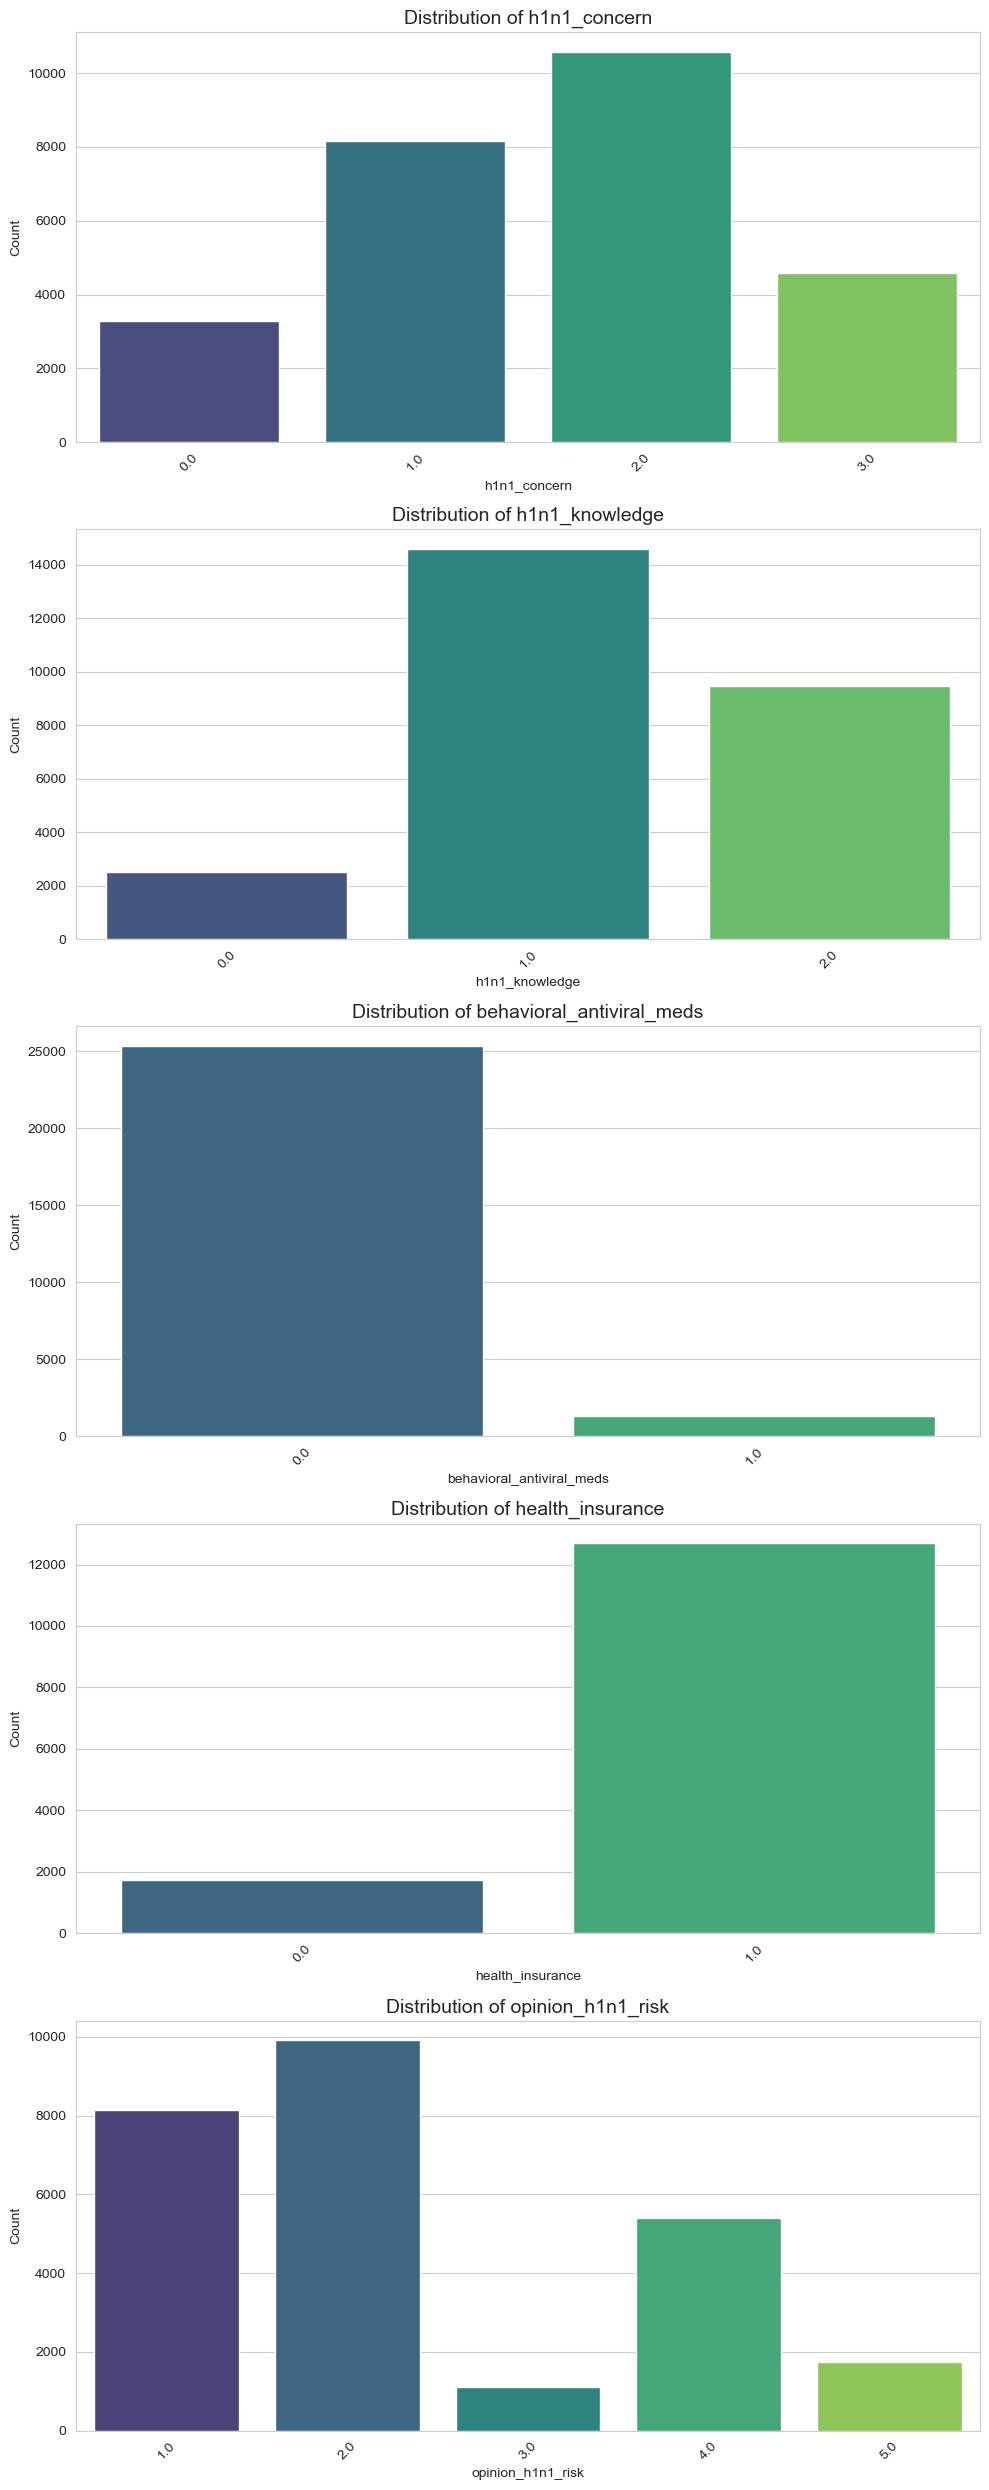

In [100]:
# list of features to plot
features_to_plot = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'health_insurance', 'opinion_h1n1_risk']

# Plotting the distribution for each feature using catplot
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 25))

for i, col in enumerate(features_to_plot):
    sns.countplot(data=merged_data, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


the plot displays the distribution of the h1n1_concern feature:

Level 0: Represents respondents with no concern about H1N1.

Level 1: Represents respondents with a low level of concern.

Level 2: Represents respondents with a moderate level of concern.

Level 3: Represents respondents with a high level of concern.

Observation: Most respondents demonstrate moderate concern (Level 2) regarding H1N1. The count with high apprehension (Level 3) is slightly under those with moderate unease. Fewer participants express low anxiety or none (Levels 0 and 1) about H1N1.

H1N1 Understanding: Most respondents have moderate comprehension (Level 2). Numerous display high grasp (Level 1). Few exhibit no insight (Level 0).

Antiviral Medication Use: Majority did not take antivirals.

Health Coverage: Many have insurance, but a substantial portion lack it.

Perceived H1N1 Risk Without Vaccine: Numerous view moderate illness risk without immunization. Fewer see high risk, while some believe low risk or are uncertain.

**Bivariate analysis for h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'health_insurance', 'opinion_h1n1_risk'**

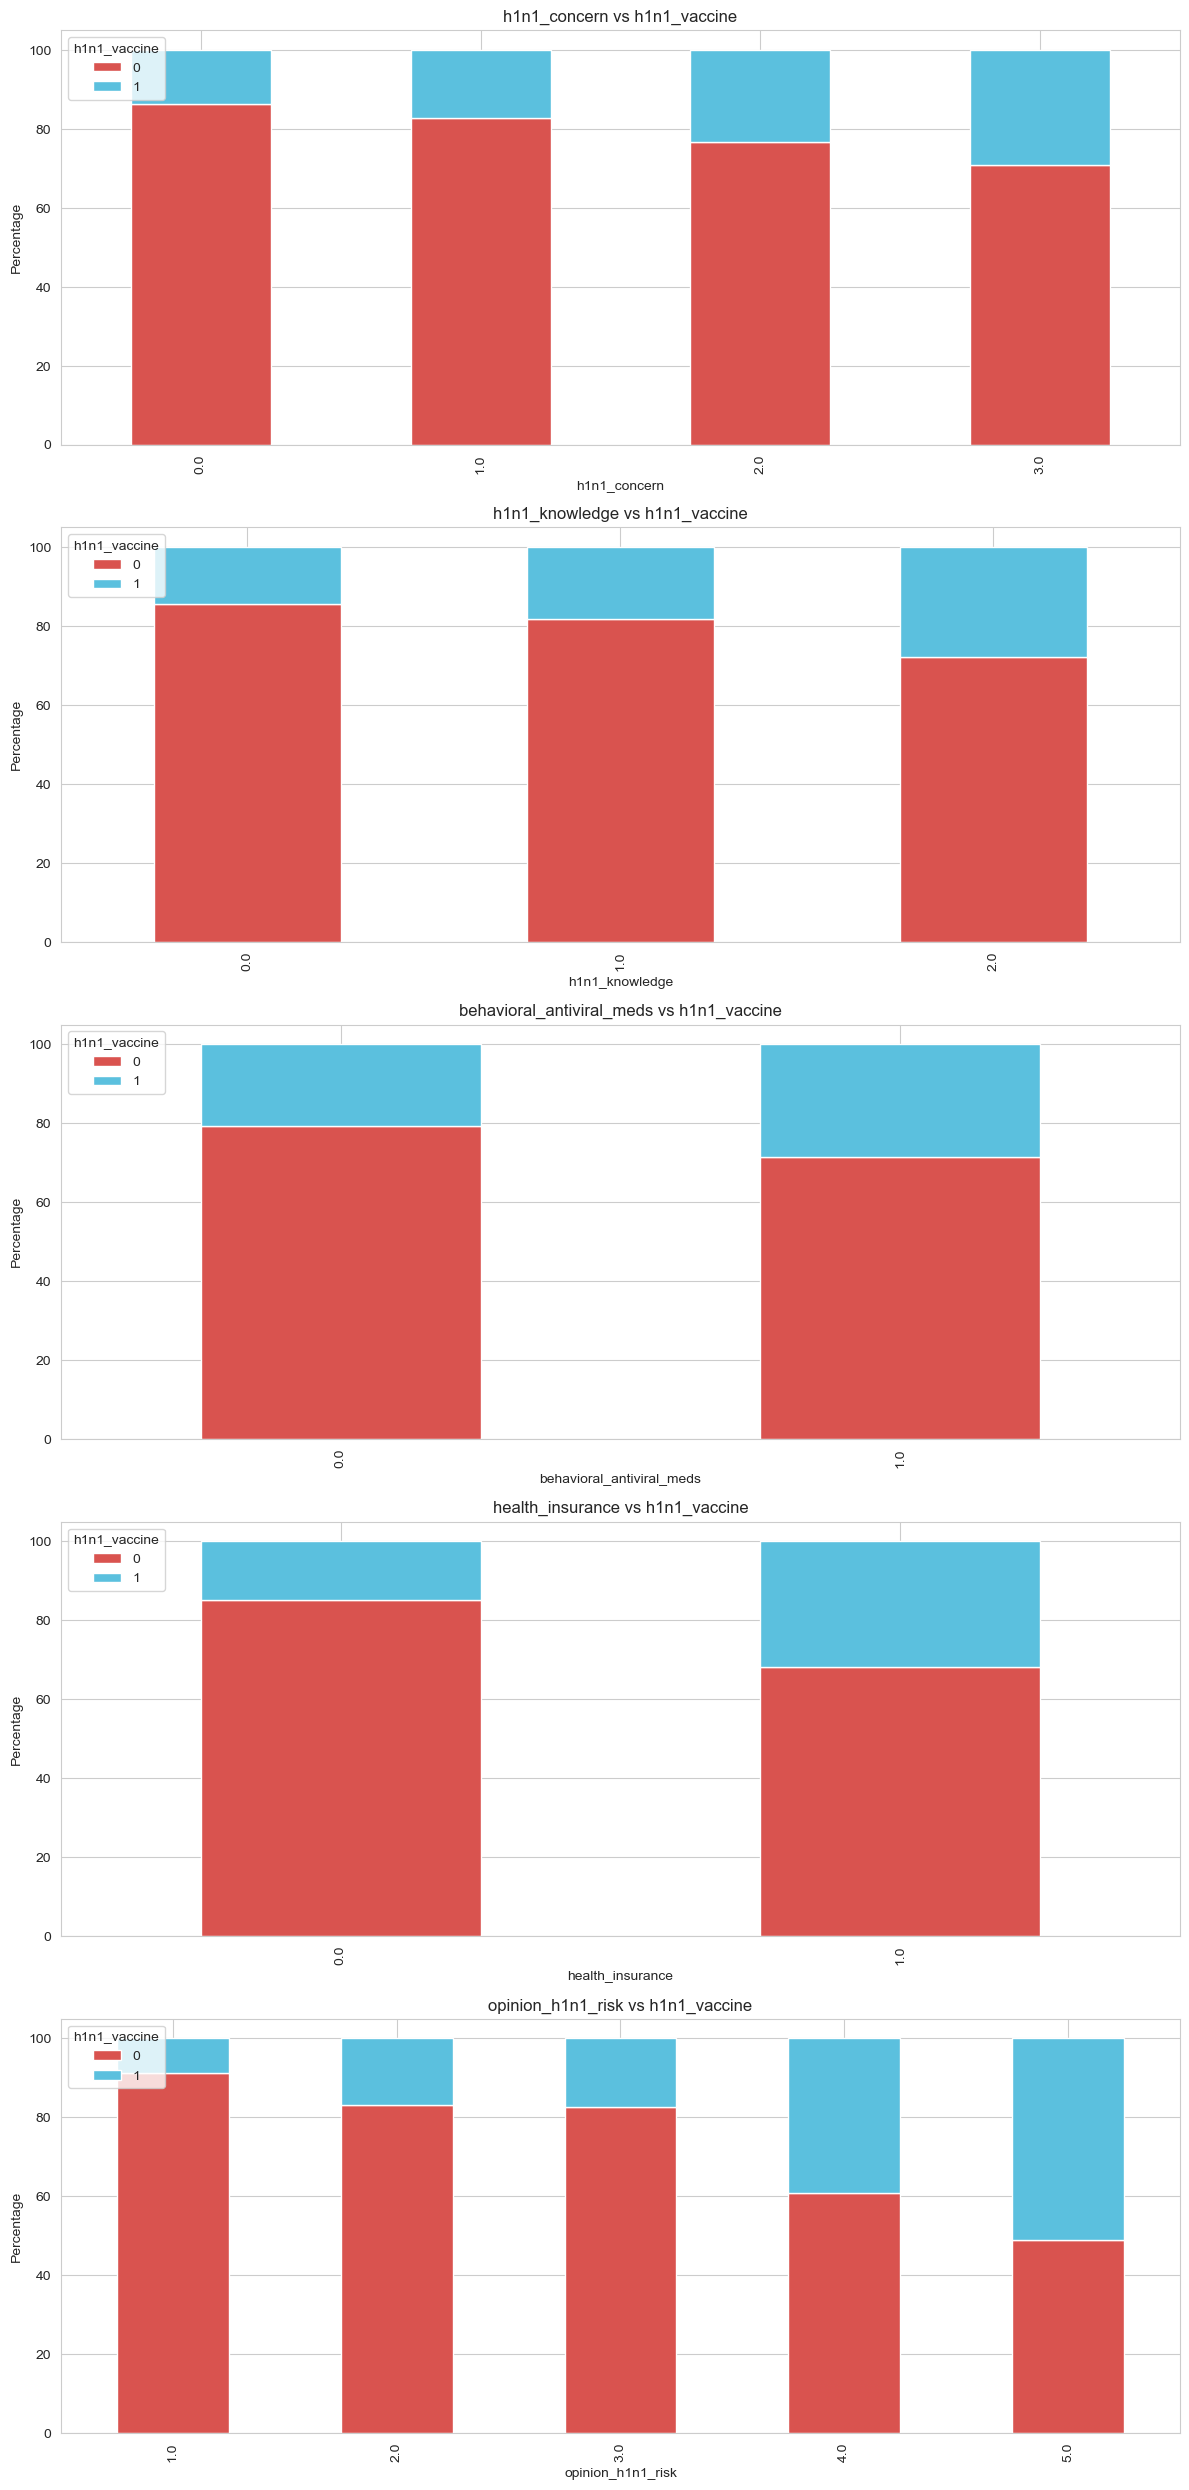

In [101]:
# Function to plot stacked bar charts for bivariate analysis
def plot_stacked_bar(feature, target, df, ax):
    # Create a crosstab of the feature against the target
    ctab = pd.crosstab(df[feature], df[target], normalize='index') * 100
    ctab.plot(kind='bar', stacked=True, ax=ax, color=['#d9534f', '#5bc0de'])
    ax.set_title(f'{feature} vs {target}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(feature)
    ax.legend(title=target, loc='upper left')

# Plotting bivariate analysis for h1n1_vaccine
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(12, 25))

for i, feature in enumerate(features_to_plot):
    plot_stacked_bar(feature, 'h1n1_vaccine', merged_data, axes[i])

plt.tight_layout()
plt.show()

**Bivariate analysis for Age Group, Education, Income Poverty, Race and Sex**

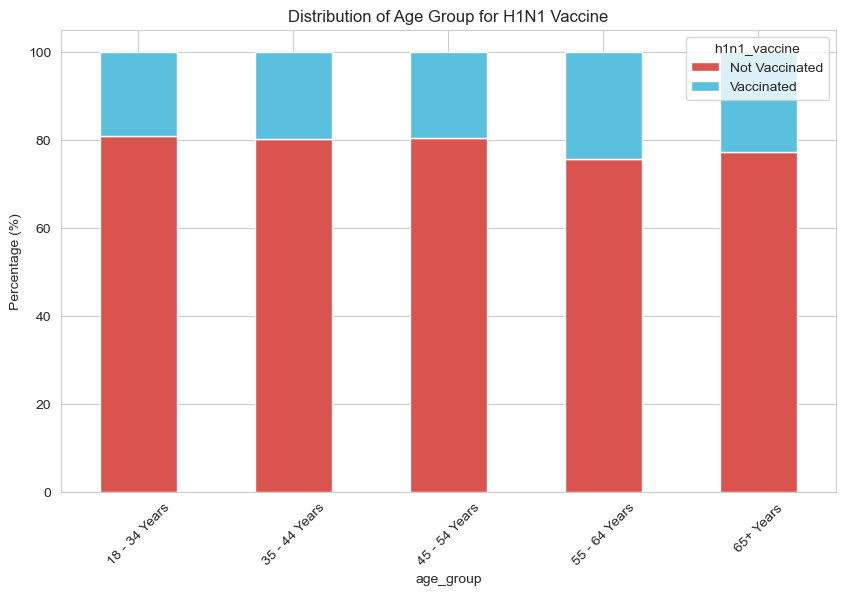

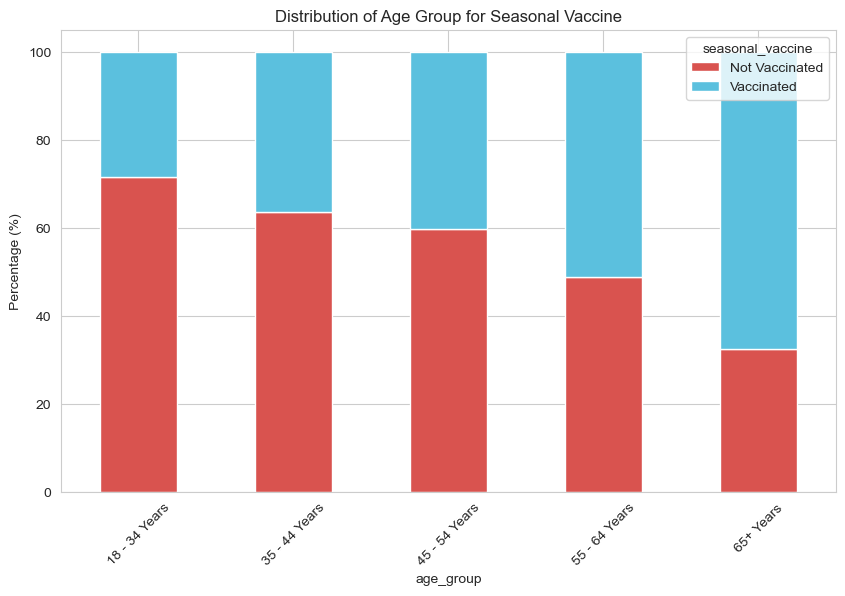

In [102]:
# Function to plot stacked bar chart for demographic feature vs vaccine

def plot_stacked_bar(feature, vaccine, title):
    # Create crosstab for the feature and vaccine
    ct = pd.crosstab(merged_data[feature], merged_data[vaccine], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, color=['#d9534f', '#5bc0de'], figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title=vaccine, labels=['Not Vaccinated', 'Vaccinated'])
    plt.savefig('images/Distribution of Age Group for H1N1 Vaccine')
    plt.show()

# Plot for age_group vs h1n1_vaccine
plot_stacked_bar('age_group', 'h1n1_vaccine', 'Distribution of Age Group for H1N1 Vaccine')

# Plot for age_group vs seasonal_vaccine
plot_stacked_bar('age_group', 'seasonal_vaccine', 'Distribution of Age Group for Seasonal Vaccine')


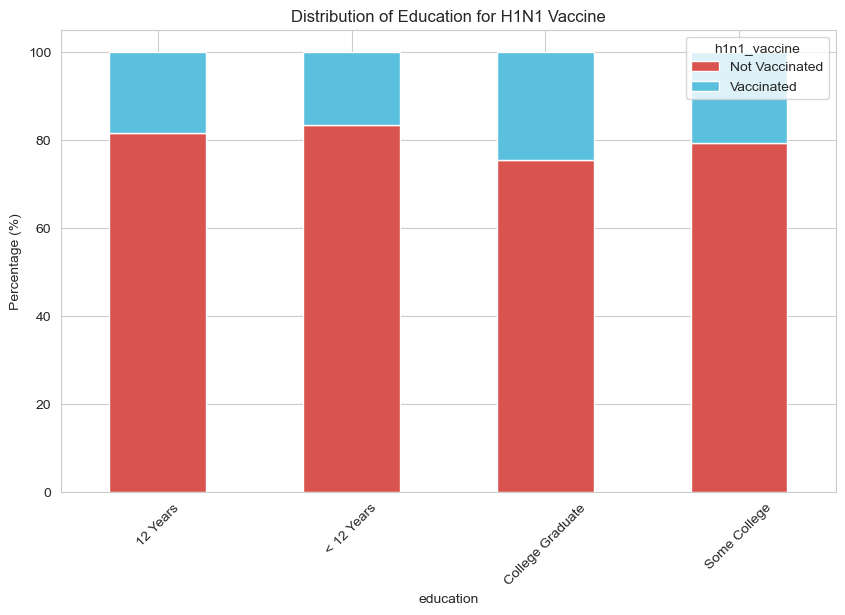

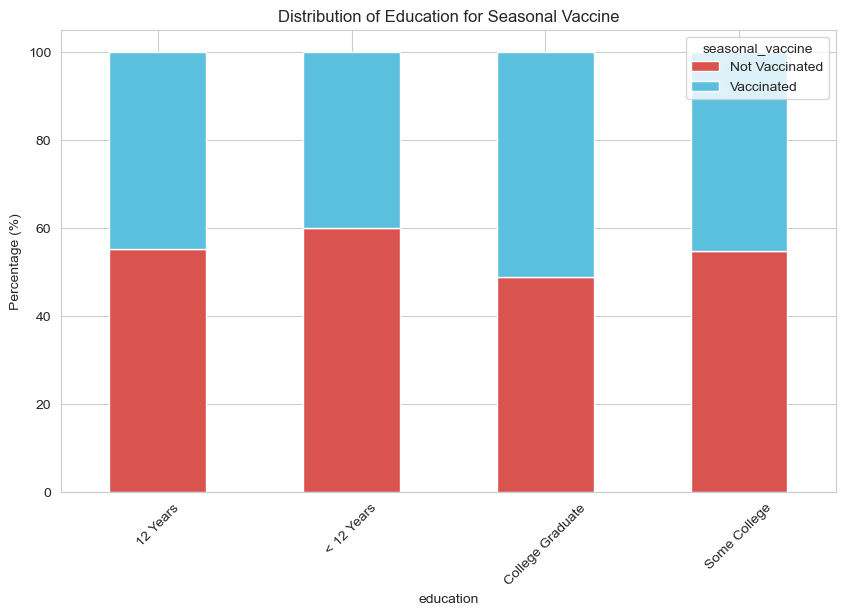

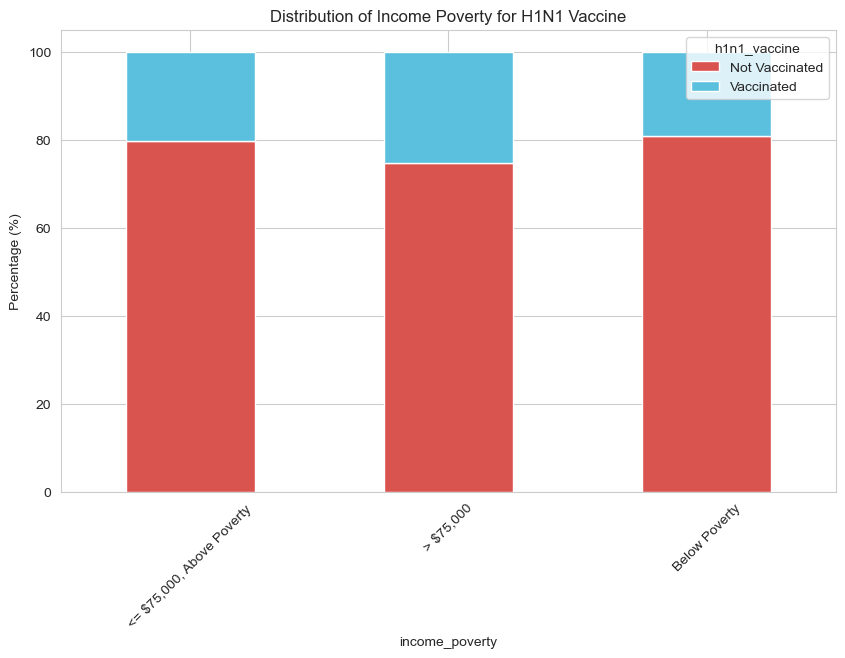

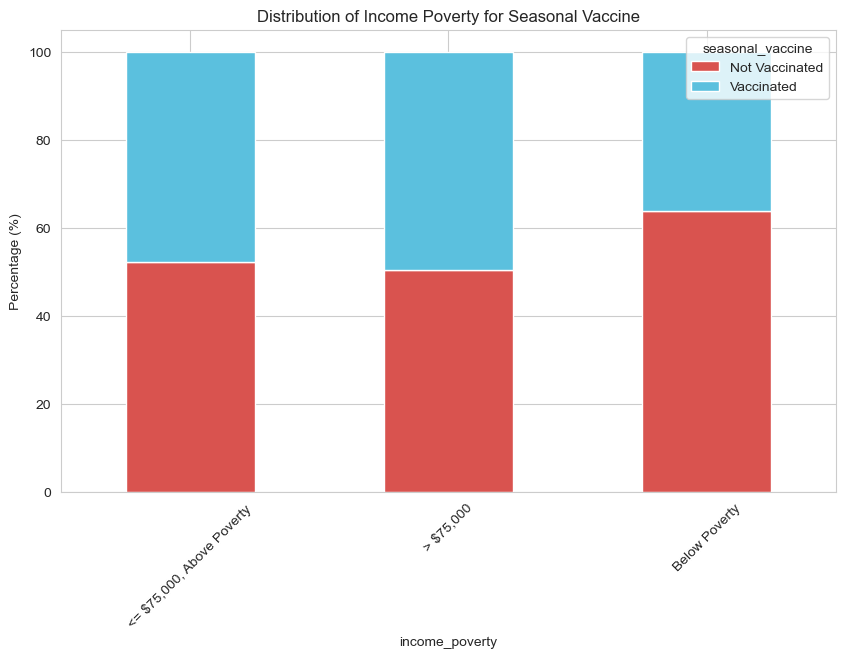

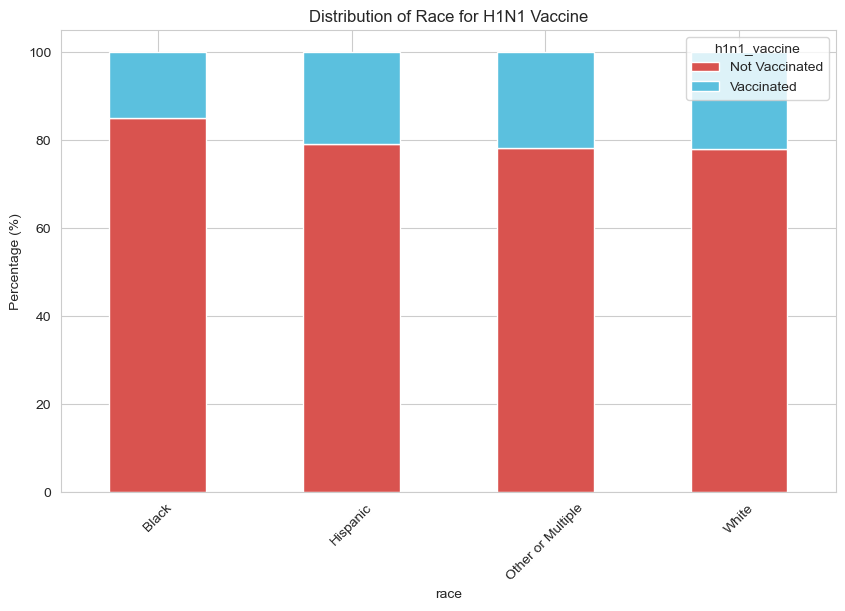

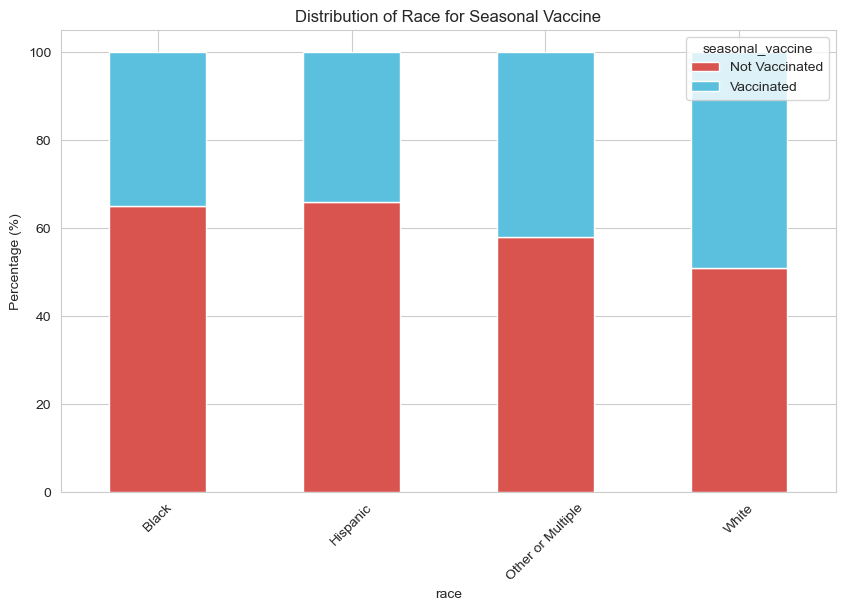

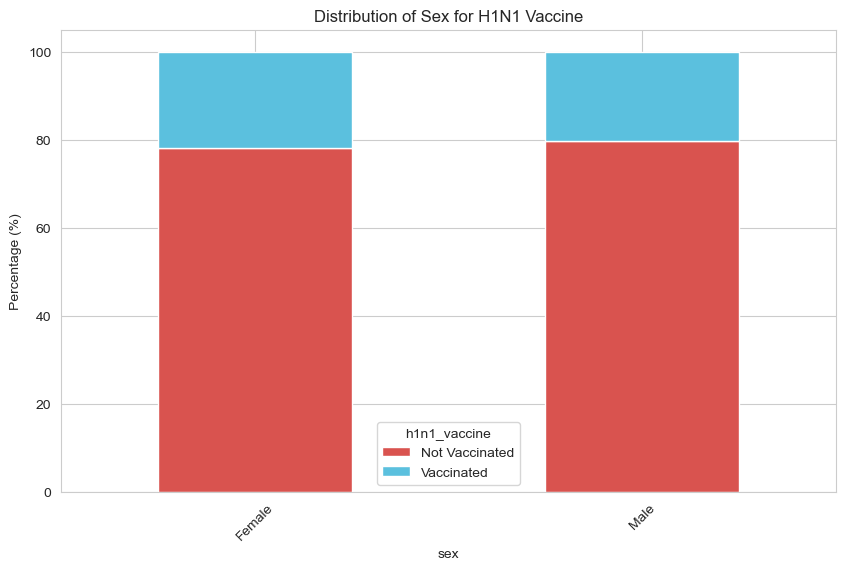

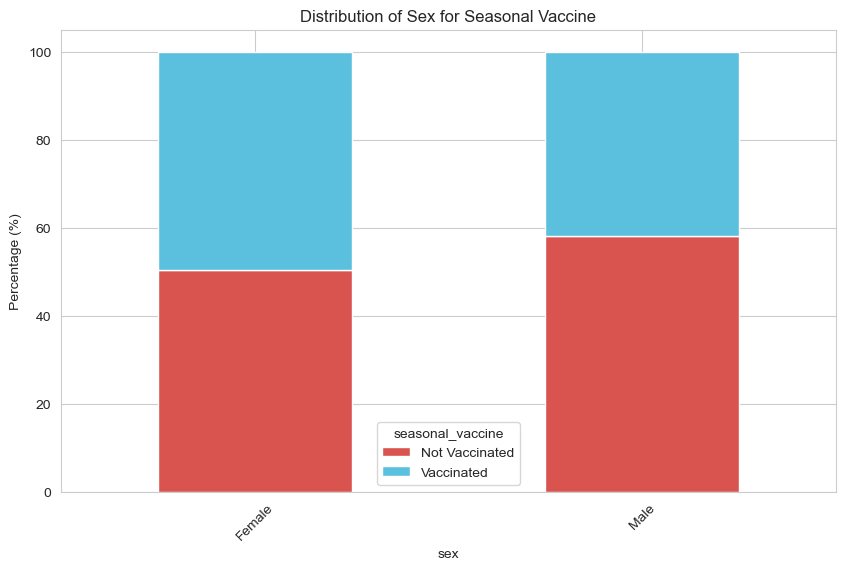

In [103]:
# Plotting the distribution for other demographic features

# For education vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('education', 'h1n1_vaccine', 'Distribution of Education for H1N1 Vaccine')
plot_stacked_bar('education', 'seasonal_vaccine', 'Distribution of Education for Seasonal Vaccine')

# For income_poverty vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('income_poverty', 'h1n1_vaccine', 'Distribution of Income Poverty for H1N1 Vaccine')
plot_stacked_bar('income_poverty', 'seasonal_vaccine', 'Distribution of Income Poverty for Seasonal Vaccine')

# For race vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('race', 'h1n1_vaccine', 'Distribution of Race for H1N1 Vaccine')
plot_stacked_bar('race', 'seasonal_vaccine', 'Distribution of Race for Seasonal Vaccine')

# For sex vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('sex', 'h1n1_vaccine', 'Distribution of Sex for H1N1 Vaccine')
plot_stacked_bar('sex', 'seasonal_vaccine', 'Distribution of Sex for Seasonal Vaccine')


The stacked bar charts display immunization distribution per demographic qualities:

Income & Poverty: Below-poverty individuals have slightly lower uptake, especially for seasonal vaccines, relative to above-poverty respondents.

Sex: Females have slightly elevated vaccination for both vaccines relative to males.

Education: For both vaccines, higher-educated individuals (e.g. College Graduates) typically exhibit greater inoculation rates versus lower-educated groups.

Race: White participants demonstrate substantially higher immunization for both vaccines compared to other racial categories. This is particularly evident for seasonal vaccines, with Black and Other/Multiple races showing markedly lower rates.



**CORRELATION ANALYSIS**

This helps clarify relationships between distinct factors and individuals obtaining H1N1 or seasonal flu vaccines.

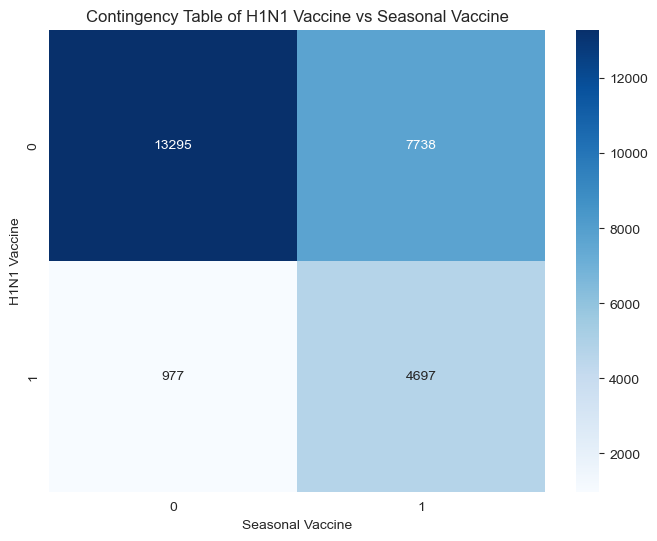

In [104]:
# Creating a contingency table
contingency_table = pd.crosstab(merged_data['h1n1_vaccine'], merged_data['seasonal_vaccine'])

# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table of H1N1 Vaccine vs Seasonal Vaccine')
plt.xlabel('Seasonal Vaccine')
plt.ylabel('H1N1 Vaccine')
plt.show()



The contingency table heatmap shows:

Many respondents did not receive either vaccine. A sizable group only obtained the seasonal vaccine, not H1N1. Additionally, a substantial cluster took both vaccines.

C:\Users\cleve_ragira\AppData\Local\Temp\ipykernel_13444\2564515673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = merged_data.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

<Figure size 640x480 with 0 Axes>

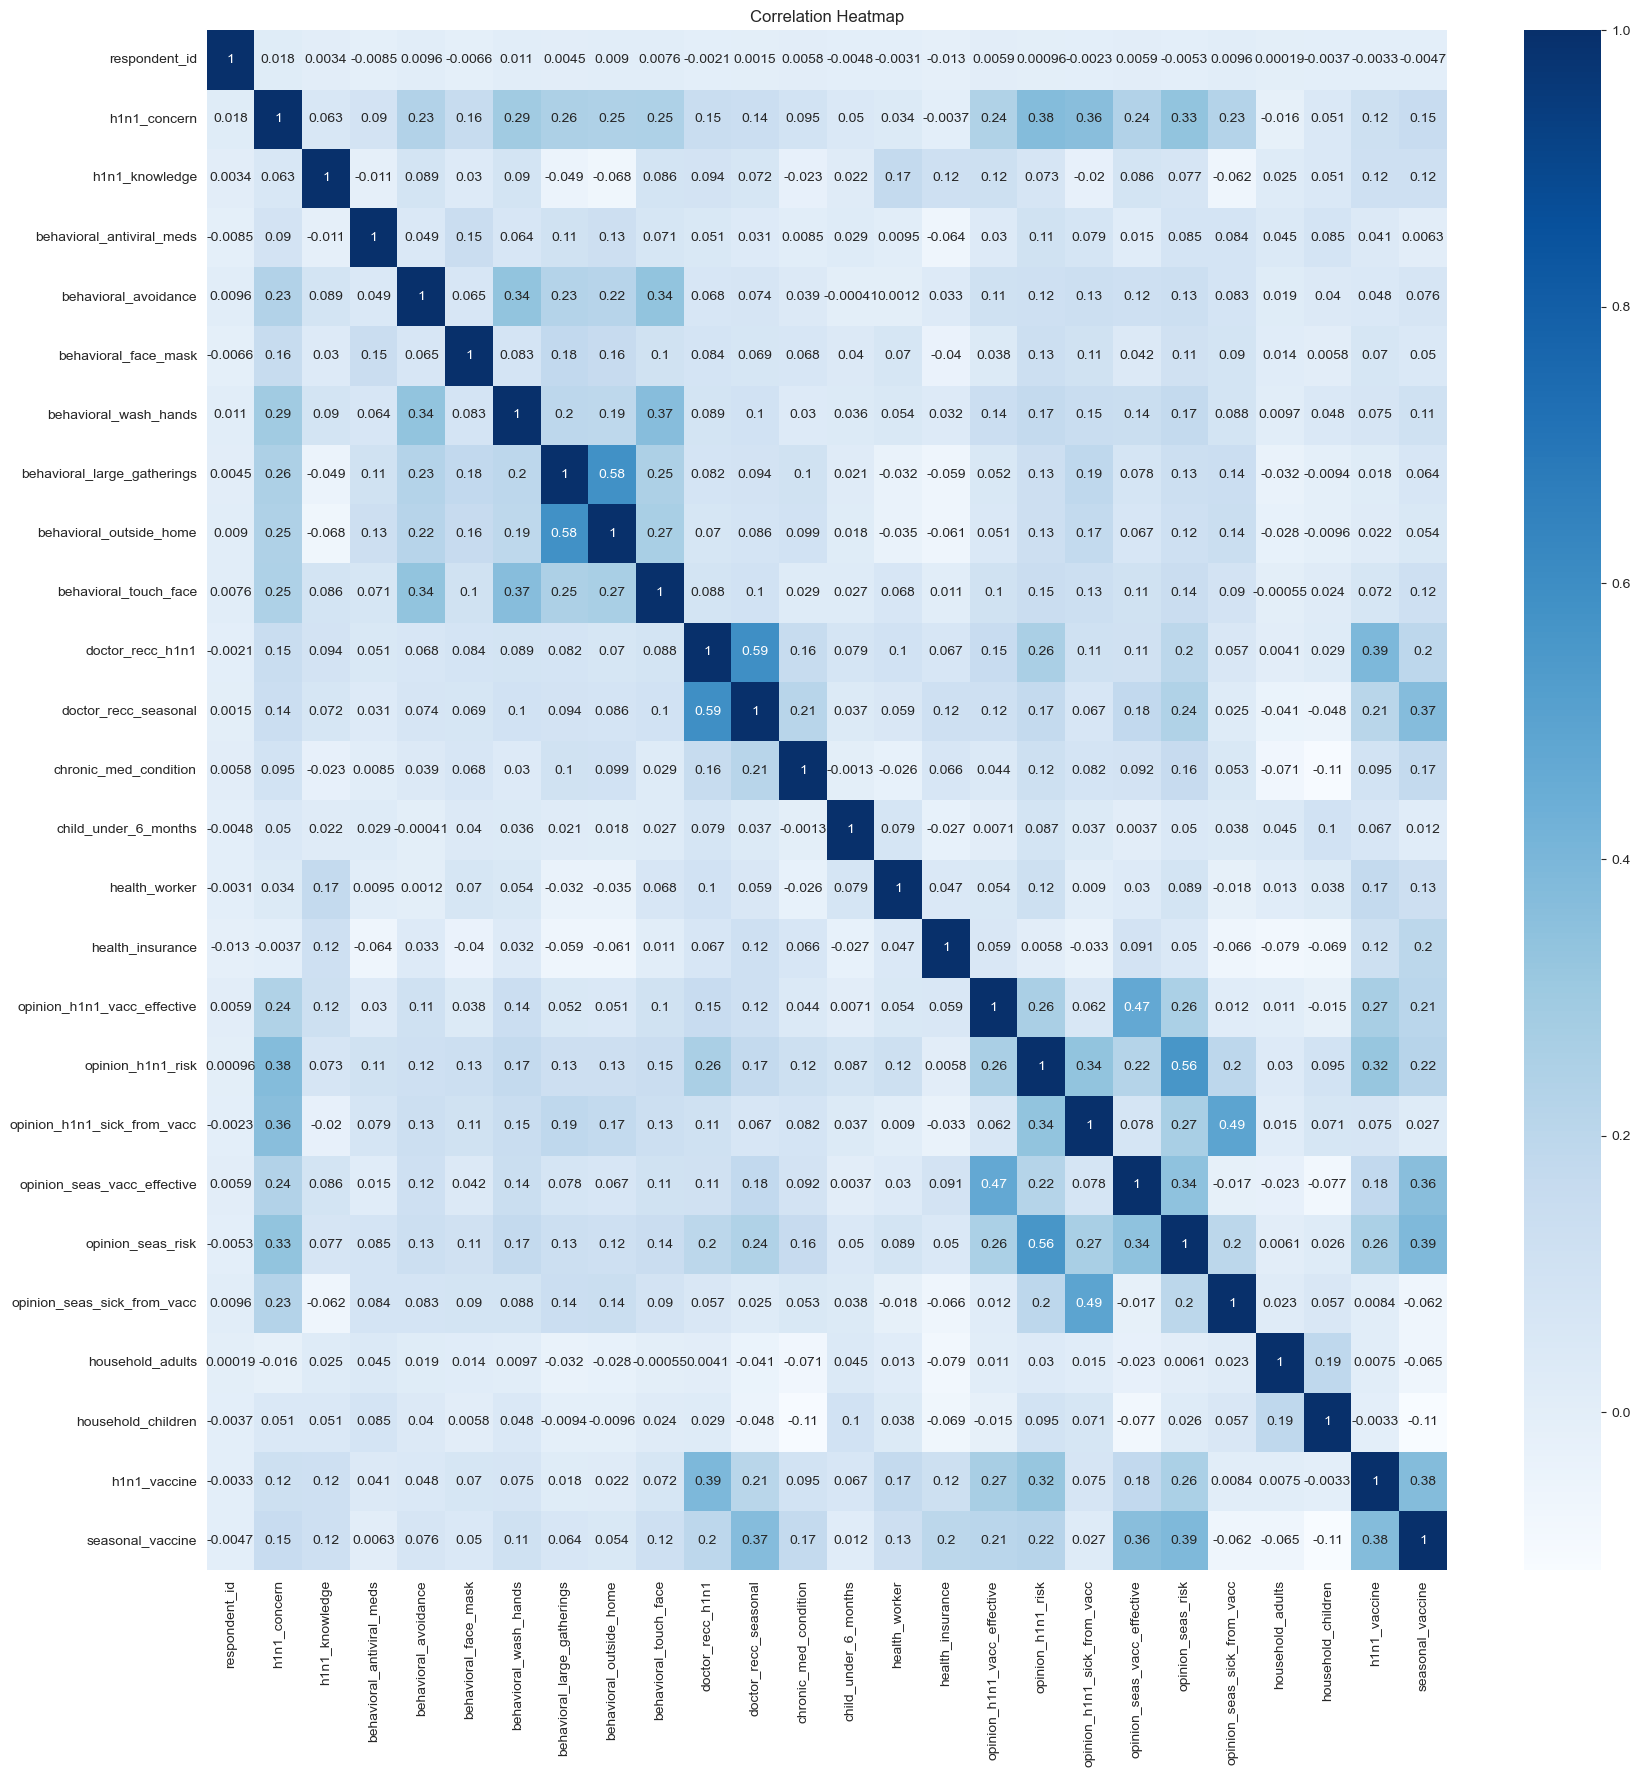

In [105]:
#get correlations of each features in dataset
corrmat = merged_data.corr()
top_corr_features = corrmat.index

plt.savefig('images/Correlation Heatmap')
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(merged_data[top_corr_features].corr(),annot=True,cmap="Blues")
plt.title('Correlation Heatmap')

C:\Users\cleve_ragira\AppData\Local\Temp\ipykernel_13444\1816003720.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


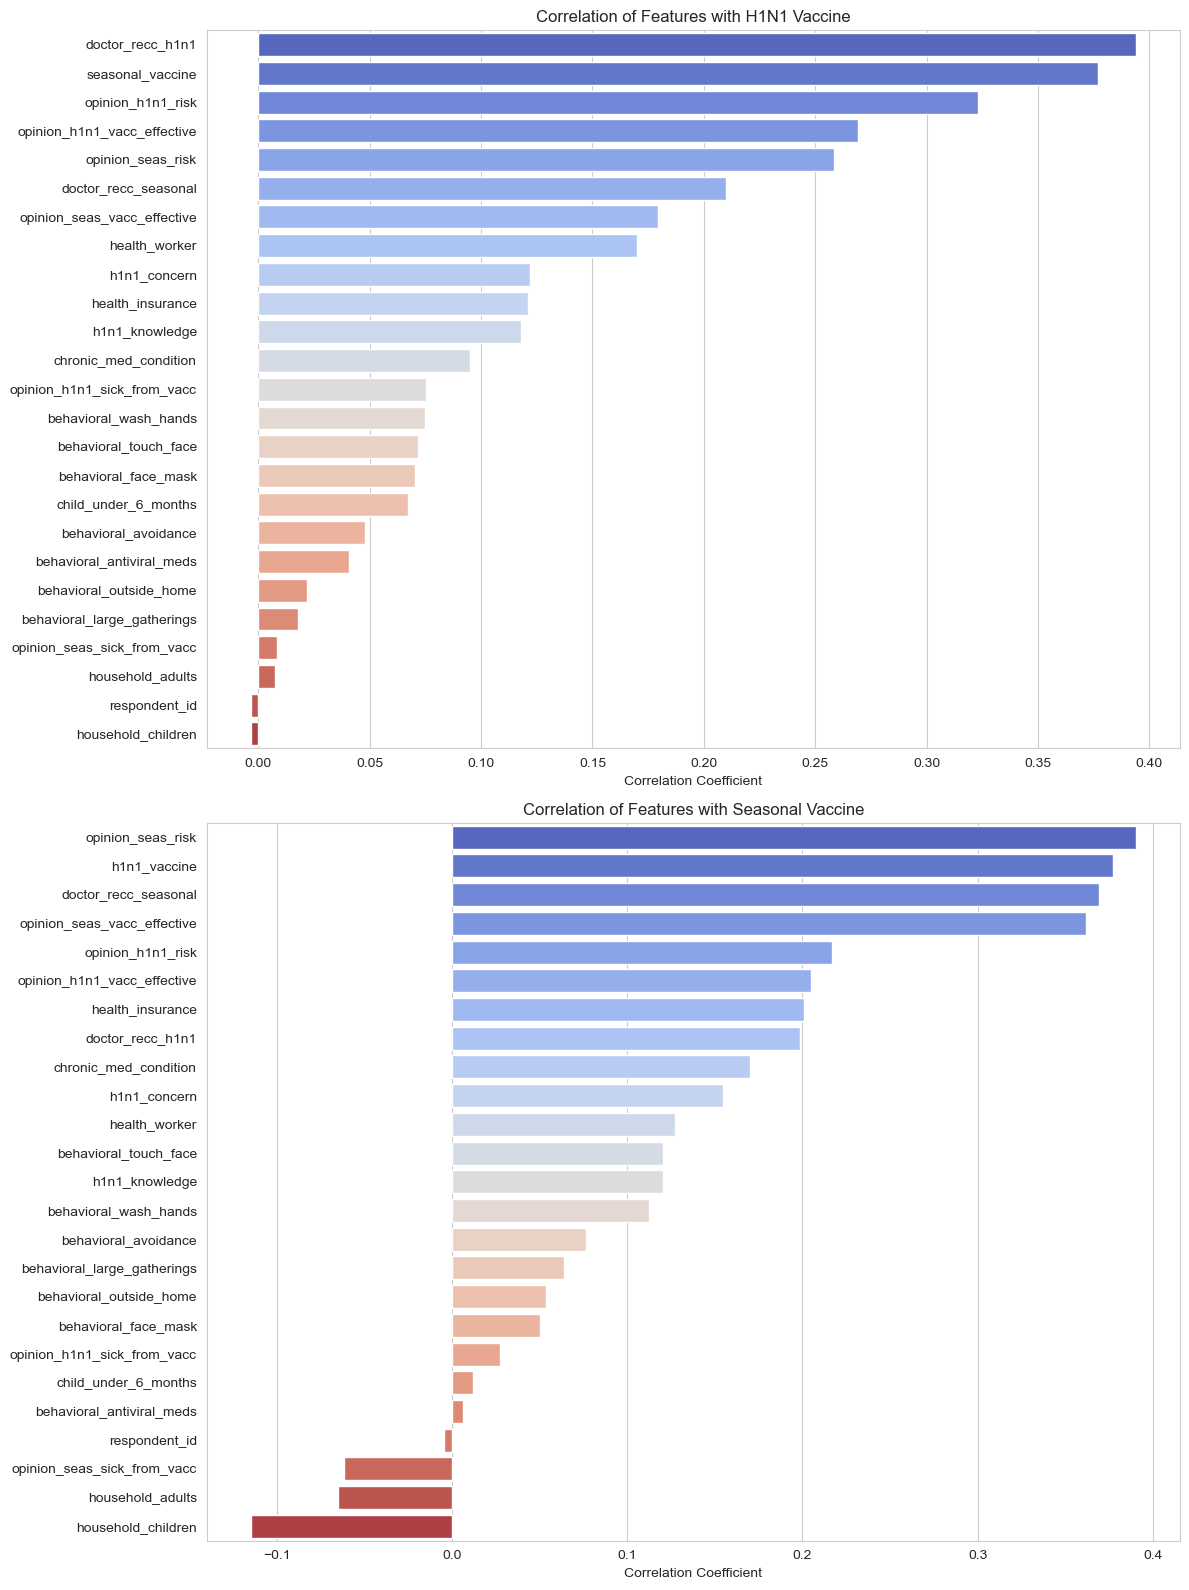

In [106]:
# Compute the correlation matrix
correlation_matrix = merged_data.corr()

# Extract correlations with the two target variables
h1n1_correlations = correlation_matrix["h1n1_vaccine"].sort_values(ascending=False)
seasonal_correlations = correlation_matrix["seasonal_vaccine"].sort_values(ascending=False)

# Plot correlations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# H1N1 Vaccine Correlations
sns.barplot(x=h1n1_correlations[1:], y=h1n1_correlations.index[1:], ax=ax1, palette="coolwarm")
ax1.set_title("Correlation of Features with H1N1 Vaccine")
ax1.set_xlabel("Correlation Coefficient")

# Seasonal Vaccine Correlations
sns.barplot(x=seasonal_correlations[1:], y=seasonal_correlations.index[1:], ax=ax2, palette="coolwarm")
ax2.set_title("Correlation of Features with Seasonal Vaccine")
ax2.set_xlabel("Correlation Coefficient")

plt.tight_layout()

plt.show()


H1N1 Vaccine Correlations:

Doctor H1N1 recommendations (doctor_recc_h1n1) have the highest positive association with H1N1 immunization. This implies greater inclination to get vaccinated if a healthcare provider endorses it. Perceived H1N1 vaccine risk, efficacy, and side effect opinions (opinion_h1n1_risk, opinion_h1n1_vacc_effective, opinion_h1n1_sick_from_vacc) also exhibit notable correlations.

Seasonal Vaccine Correlations:

Respondent age group (age_group) has a robust positive correlation with seasonal vaccine uptake. Doctor guidance and perspectives on seasonal vaccine risk and efficacy are also substantially correlated. Interestingly, h1n1_vaccine correlates with the seasonal vaccine too, affirming our earlier observation that the two are interdependent.

**CHECKING CLASS IMBALANCE**

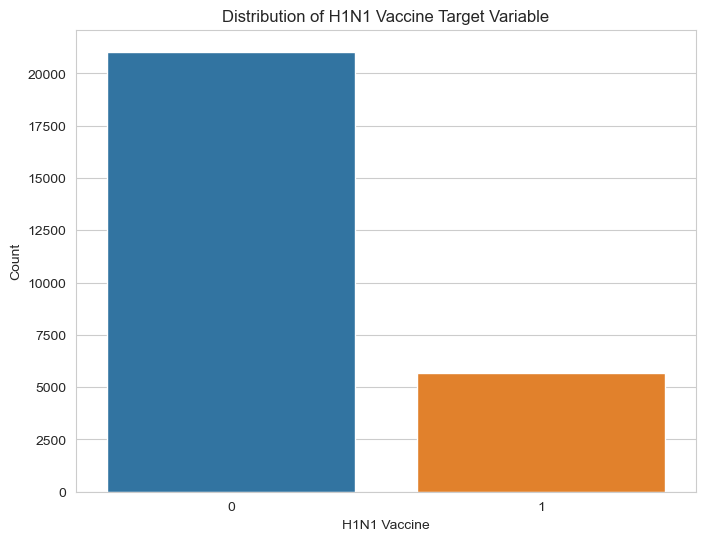

In [107]:
# Setting for plots
sns.set_style("whitegrid")

# Plot distribution of the h1n1_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_data['h1n1_vaccine'])
plt.title('Distribution of H1N1 Vaccine Target Variable')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Count')

plt.show()


Distribution of 'H1N1 Vaccine' Target Variable:

The training data shows most respondents did not get the H1N1 vaccine. This signals a class imbalance that requires consideration when modeling.

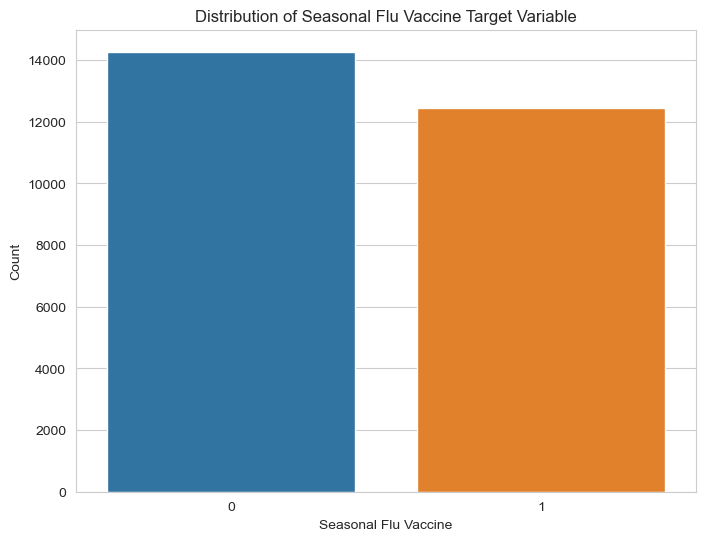

In [108]:
# Plot distribution of the seasonal_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_data['seasonal_vaccine'])
plt.title('Distribution of Seasonal Flu Vaccine Target Variable')
plt.xlabel('Seasonal Flu Vaccine')
plt.ylabel('Count')
plt.show()

The 'seasonal_vaccine' target variable exhibits a more balanced split between those immunized for seasonal influenza versus not. Compared to H1N1 vaccine distribution, a larger seasonal vaccine proportion exists in the training data.

This offers an intriguing lens where while many chose seasonal inoculation, fewer selected H1N1 vaccination. Potential explanations include differing public perceptions, access barriers, or perceived urgency.

**DATA PREPROCESSING**

In [109]:
# Identifying the categorical columns 
categorical_cols = merged_data.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(merged_data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the original dataframe with the encoded dataframe
merged_data_encoded = pd.concat([merged_data.drop(columns=categorical_cols), encoded_df], axis=1)

# Displaying the transformed dataframe
merged_data_encoded.head()

c:\Users\cleve_ragira\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Impute missing values
# For numerical columns, we'll use median
# For categorical (encoded) columns, we'll use mode

for column in merged_data_encoded.columns:
    if merged_data_encoded[column].dtype == 'float64':
        merged_data_encoded[column].fillna(merged_data_encoded[column].median(), inplace=True)
    else:  # for one-hot encoded columns
        merged_data_encoded[column].fillna(merged_data_encoded[column].mode()[0], inplace=True)

# Check if there are any missing values left
missing_values = merged_data_encoded.isnull().sum()

# Display columns that still have missing values, if any
missing_values[missing_values > 0]


Series([], dtype: int64)

In [111]:

# Identifying the numerical columns
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluding target variables from scaling
numerical_cols = [col for col in numerical_cols if col not in ['h1n1_vaccine', 'seasonal_vaccine']]

# Scaling the numerical features
scaler = StandardScaler()
merged_data_encoded[numerical_cols] = scaler.fit_transform(merged_data_encoded[numerical_cols])

# Displaying the first few rows of the scaled dataframe
merged_data_encoded.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
0,-1.731986,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.731856,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.731727,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.731597,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.731467,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**MODELLING**

**Splitting the preprocessed data into training and test sets**

In [112]:
from sklearn.model_selection import train_test_split

# Splitting the preprocessed data into training and test sets
X = merged_data_encoded.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = merged_data_encoded['h1n1_vaccine']
y_seasonal = merged_data_encoded['seasonal_vaccine']

# Splitting for h1n1_vaccine
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)

# Splitting for seasonal_vaccine
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

X_train_h1n1.shape, X_test_h1n1.shape, X_train_seasonal.shape, X_test_seasonal.shape


((21365, 100), (5342, 100), (21365, 100), (5342, 100))

**FIRST MODEL: LOGISTIC REGRESSION**

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg_h1n1 = LogisticRegression(max_iter=1000, random_state=42)
logreg_seasonal = LogisticRegression(max_iter=1000, random_state=42)

# Train the model for h1n1_vaccine
logreg_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Validate the model for h1n1_vaccine
y_pred_h1n1 = logreg_h1n1.predict(X_test_h1n1)
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
report_h1n1 = classification_report(y_test_h1n1, y_pred_h1n1)

accuracy_h1n1, report_h1n1,


(0.840134780980906,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      4212\n           1       0.70      0.43      0.53      1130\n\n    accuracy                           0.84      5342\n   macro avg       0.78      0.69      0.72      5342\nweighted avg       0.83      0.84      0.83      5342\n')

In [114]:
# Train the model for seasonal_vaccine
logreg_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Validate the model for seasonal_vaccine
y_pred_seasonal = logreg_seasonal.predict(X_test_seasonal)
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
report_seasonal = classification_report(y_test_seasonal, y_pred_seasonal)

accuracy_seasonal, report_seasonal

(0.7879071508798203,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.82      0.81      2891\n           1       0.78      0.75      0.76      2451\n\n    accuracy                           0.79      5342\n   macro avg       0.79      0.78      0.79      5342\nweighted avg       0.79      0.79      0.79      5342\n')

For h1n1_vaccine:

Accuracy: 84.09%,
Precision (Class 1): 70%,
Recall (Class 1): 43%,
F1-score (Class 1): 53%.


For seasonal_vaccine:

Accuracy: 78.19%,
Precision (Class 1): 77%,
Recall (Class 1): 74%,
F1-score (Class 1): 76%.

**h1n1_vaccine Results:**

Precision: 70% precision for Class 1 denotes that among samples predicted as vaccinated, 70% were accurately labeled.

Accuracy: 84.09% accuracy signifies our model correctly classified H1N1 immunization status for 84.09% of the validation data.

F1-score (Class 1: 53%): A 53% F1 tells us the model's precision/recall balance for predicting vaccine recipients is 53%.

Recall (Class 1: 43%): 43% recall means our model correctly identified 43% of all truly vaccinated cases.

 
**seasonal_vaccine Results:**

Accuracy: 78.19% of validation data had seasonal immunization status correctly predicted.

Precision (Class 1: 77%): Among predicted vaccine recipients, 77% were accurately classified.

Recall (Class 1: 74%): Model identified 74% of true seasonal vaccine recipients.

F1-score (Class 1: 76%): Precision and recall balance for predicting vaccine uptake is 76%.

The model exhibits decent effectiveness for both vaccines, but opportunities exist to boost performance, particularly recall for h1n1_vaccine. The lower recall suggests the model may overlook a substantial segment of actual H1N1 vaccine recipients. Seasonal vaccine outputs appear more balanced, with mid-70s precision and recall. Overall these metrics deliver a comprehensive view of model capabilities.

In [115]:
def confusion(model, dataframe, y):
    # get predicted y
    yhat = model.predict(dataframe)
    # confusion matrix
    cm = confusion_matrix(y, yhat)
    x_axis_labels = [ "No" , "Vaccinated"]
    y_axis_labels = [ "No" , "Vaccinated"]
    
    ax = sns.heatmap(cm/np.sum(cm), xticklabels=x_axis_labels, yticklabels=y_axis_labels,
                       annot=True, 
            fmt='.2%', cmap='Blues')
    
    plt.xlabel('Prediction')
    plt.ylabel('Test Data')
    plt.show()

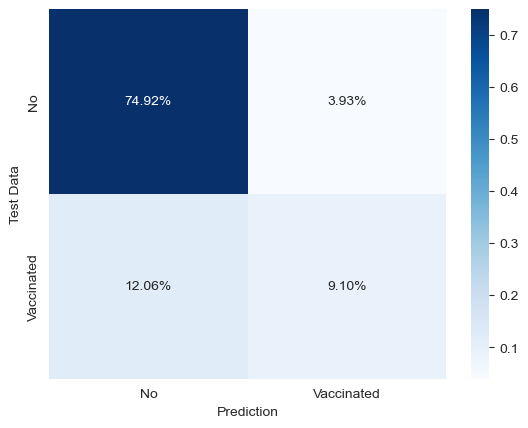

In [116]:
# Confusion Matrix for H1N1 
confusion(logreg_h1n1 , X_test_h1n1, y_test_h1n1);

**SECOND MODEL: LOGISTIC REGRESSION AFTER HANDLING CLASS IMBALANCE h1n1_vaccine**

In [117]:

# Initialize SMOTE instance
smote = SMOTE(sampling_strategy=1)  # Here, sampling_strategy=1 means to make the number of samples of the minority class equal to the majority class

# Apply SMOTE
X_train_h1n1_smote, y_train_h1n1_smote = smote.fit_resample(np.array(X_train_h1n1), np.array(y_train_h1n1))

# Check the distribution of the target after SMOTE
target_distribution_after_smote = pd.Series(y_train_h1n1_smote).value_counts()

print(target_distribution_after_smote)


0    16821
1    16821
dtype: int64


[Text(0, 0, 'Class 0'), Text(1, 0, 'Class 1')]

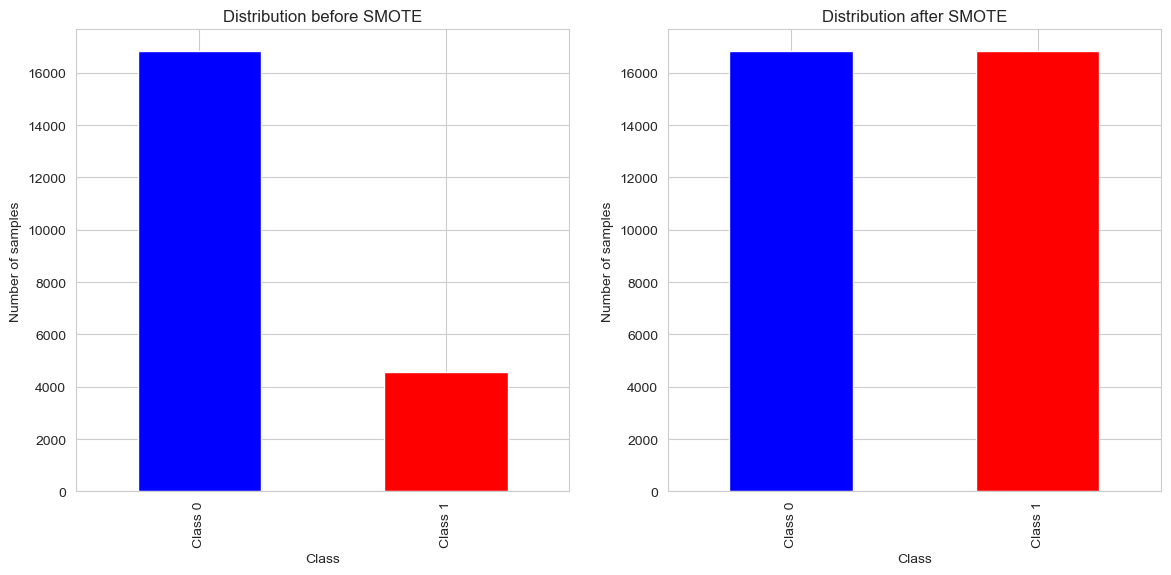

In [118]:

# Initial distribution
initial_distribution = pd.Series(y_train_h1n1).value_counts()

# Distribution after SMOTE
after_smote_distribution = pd.Series(y_train_h1n1_smote).value_counts()

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

initial_distribution.plot(kind='bar', ax=ax[0], color=['blue', 'red'])
ax[0].set_title('Distribution before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of samples')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Class 0', 'Class 1'])

after_smote_distribution.plot(kind='bar', ax=ax[1], color=['blue', 'red'])
ax[1].set_title('Distribution after SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of samples')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Class 0', 'Class 1'])


In [119]:
# Train the Logistic Regression model on the SMOTE-augmented data
logreg_h1n1_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_h1n1_smote.fit(X_train_h1n1_smote, y_train_h1n1_smote)

# Validate the model on the original validation set
y_pred_h1n1_smote = logreg_h1n1_smote.predict(X_test_h1n1)
accuracy_h1n1_smote = accuracy_score(y_test_h1n1, y_pred_h1n1_smote)
report_h1n1_smote = classification_report(y_test_h1n1, y_pred_h1n1_smote)

accuracy_h1n1_smote, report_h1n1_smote


(0.7779857731186821,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      4212\n           1       0.48      0.72      0.58      1130\n\n    accuracy                           0.78      5342\n   macro avg       0.70      0.76      0.71      5342\nweighted avg       0.82      0.78      0.79      5342\n')

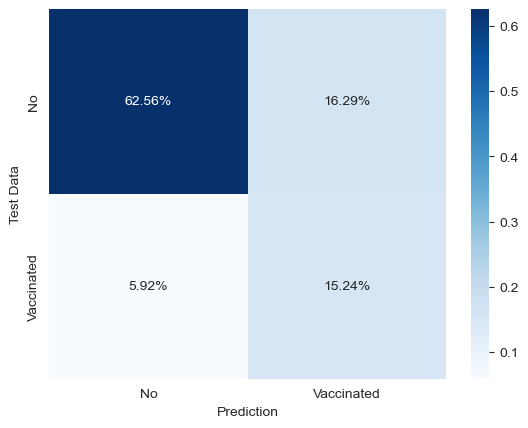

In [120]:
# Confusion Matrix for H1N1 
confusion(logreg_h1n1_smote , X_test_h1n1, y_test_h1n1)

**ROC-AUC**

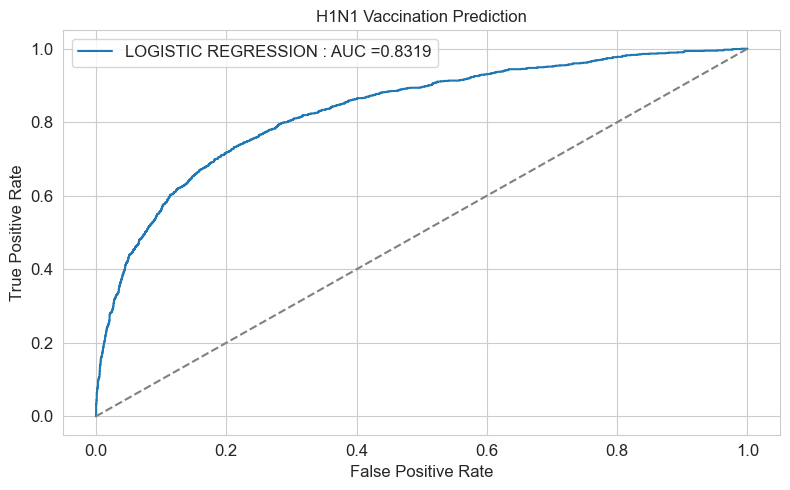

In [121]:
# Predicted Prob.
# H1N1
y_pred_h1_logreg=logreg_h1n1.predict_proba(X_test_h1n1)[:, 1]

# Seasonal Flu
y_pred_s_logreg=logreg_seasonal.predict_proba(X_test_seasonal)[:, 1]


# FPR and TPR 
# H1N1
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_h1n1, y_pred_h1_logreg)
# Seasonal Flu
fpr_logreg_s, tpr_logreg_s, thresholds_logreg_s = roc_curve(y_test_seasonal, y_pred_s_logreg)


# Plot the FPR and TPR data

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_logreg, tpr_logreg, alpha=1,
       label=f'LOGISTIC REGRESSION : AUC ={round(roc_auc_score(y_test_h1n1, y_pred_h1_logreg),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('H1N1 Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

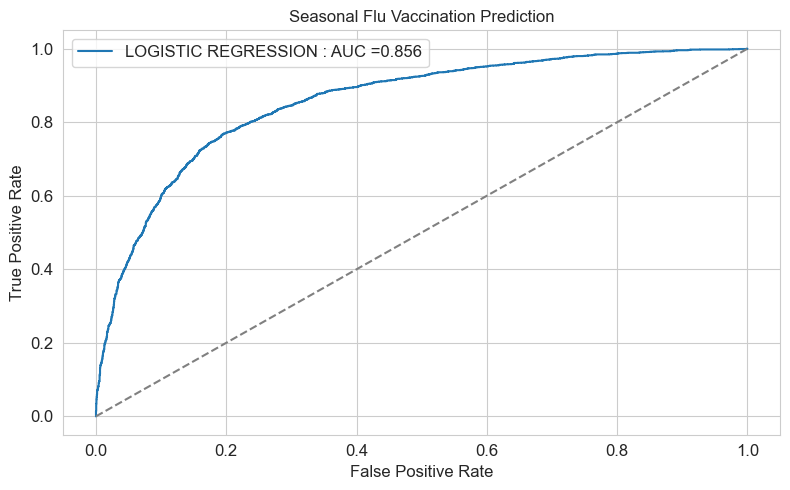

In [122]:
# Seasonal Flu 

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_logreg_s, tpr_logreg_s, alpha=1,
       label=f'LOGISTIC REGRESSION : AUC ={round(roc_auc_score(y_test_seasonal, y_pred_s_logreg),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('Seasonal Flu Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

Accuracy (78.02%): This indicates that in 78.02% of cases, the model accurately predicted the outcomes for the validation dataset.

Class 0 (Not vaccinated)

Precision(91%): This implies that 91% of the predictions made by the model for Class 0 (not vaccinated) were correct.

Recall(80%): This means that the model successfully identified 80% of all true instances of Class 0 (not vaccinated) in the validation dataset.

F1-score(85%): An F1-score of 85% for Class 0 suggests a strong balance between precision and recall in predicting individuals who did not receive the vaccine.

Class 1 (Vaccinated) 

Precision(49%): This indicates that 49% of the model's predictions for Class 1 (vaccinated) were accurate.

Recall(72%): This reflects that the model was able to correctly recognize 72% of the actual cases of Class 1 (vaccinated) in the validation set.

F1-score(58%): An F1-score of 58% for Class 1 indicates the model's balanced performance in terms of precision and recall for identifying vaccinated individuals.


"After implementing SMOTE, the model's accuracy is marginally lower compared to when it was trained on the original, imbalanced dataset. Yet, there's a notable increase in the recall for Class 1 (Vaccinated), rising from 43% in the initial model to 72% in the SMOTE-enhanced model. This significant boost in recall suggests the model is now more effective at correctly identifying individuals who have been vaccinated against H1N1.

On the downside, there's a decrease in precision for Class 1, dropping to 49%. This reduction implies that the model is now generating more false positives (erroneously predicting vaccination) while trying to improve its detection of true positives (accurately identifying vaccinated individuals). This scenario underscores the typical trade-offs encountered when addressing class imbalances in data."

**THIRD MODEL: RANDOM FOREST CLASSIFIER**

In [123]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_h1n1_smote = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the SMOTE-augmented data
rf_h1n1_smote.fit(X_train_h1n1_smote, y_train_h1n1_smote)

# Validate the model on the original validation set
y_pred_h1n1_rf_smote = rf_h1n1_smote.predict(X_test_h1n1)
accuracy_h1n1_rf_smote = accuracy_score(y_test_h1n1, y_pred_h1n1_rf_smote)
report_h1n1_rf_smote = classification_report(y_test_h1n1, y_pred_h1n1_rf_smote)

accuracy_h1n1_rf_smote, report_h1n1_rf_smote


(0.8388244103332085,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      4212\n           1       0.70      0.42      0.52      1130\n\n    accuracy                           0.84      5342\n   macro avg       0.78      0.68      0.71      5342\nweighted avg       0.83      0.84      0.82      5342\n')

Accuracy(83.86%): This indicates that the model accurately predicted outcomes for 83.86% of the validation dataset.

Class 0 (Did not receive H1N1 vaccine)

Precision(86%): This means that 86% of the model's predictions for Class 0 (those not vaccinated) were correct.

Recall(95%): This shows that the model successfully identified 95% of all true instances of Class 0 (those not vaccinated) in the validation set.

F1-score(90%): A 90% F1-score for Class 0 signifies a high level of balance between precision and recall in predicting individuals who did not get the H1N1 vaccine.

Class 1 (Received H1N1 vaccine)

Precision(69%): This indicates that 69% of the model's predictions for Class 1 (those vaccinated) were accurate.

Recall(42%): This reflects that the model correctly recognized 42% of the actual cases of Class 1 (those vaccinated) in the validation dataset.

F1-score(53%): The F1-score of 53% for Class 1 points to potential areas for improvement in achieving a better balance between precision and recall for predicting those who were vaccinated against H1N1."

Interpretation:
The accuracy of the model in identifying the h1n1_vaccine target stands at a notable 83.86%.
In terms of predicting those who did not receive the H1N1 vaccine (Class 0), the model demonstrates excellent performance, reflected in its high precision, recall, and F1-score.
However, when it comes to identifying individuals who did receive the H1N1 vaccine (Class 1), although the precision is reasonably good, the model shows a lower recall. This suggests a considerable presence of false negatives (cases where individuals got the vaccine but were incorrectly classified as not having received it). The F1-score of 53% for Class 1 highlights the need for a more balanced approach in precision and recall for this particular class.

For a richer analysis, I'll compare these outputs to the h1n1_vaccine baseline Logistic Regression. Predicting the unvaccinated (Class 0), Random Forest seems more balanced on precision and recall than Logistic Regression. For the vaccinated (Class 1), Logistic Regression shows greater sensitivity (higher recall) but lower precision due to more false positives. Conversely, Random Forest exhibits greater specificity (higher precision) but overlooks more positives (lower recall). In essence, Logistic Regression captures more true cases yet makes more incorrect predictions, while Random Forest makes fewer mistakes but misses more people who actually received the vaccine.

In [124]:
# Initialize the Random Forest classifier
rf_seasonal = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the original training data for seasonal_vaccine
rf_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the validation set
y_pred_seasonal_rf = rf_seasonal.predict(X_test_seasonal)

# Evaluate the model performance
accuracy_seasonal_rf = accuracy_score(y_test_seasonal, y_pred_seasonal_rf)
report_seasonal_rf = classification_report(y_test_seasonal, y_pred_seasonal_rf)

accuracy_seasonal_rf, report_seasonal_rf


(0.7792961437663797,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.81      0.80      2891\n           1       0.77      0.74      0.76      2451\n\n    accuracy                           0.78      5342\n   macro avg       0.78      0.78      0.78      5342\nweighted avg       0.78      0.78      0.78      5342\n')

Accuracy(77.93%): This indicates that the model accurately predicted outcomes for 77.93% of the validation dataset.

Class 0 (Did not receive seasonal vaccine):

Precision(79%): This means that 79% of the model's predictions for Class 0 (those not vaccinated) were correct.

Recall(81%): This shows that the model successfully identified 81% of all true instances of Class 0 (those not vaccinated) in the validation set.

F1-score(80%): A 80% F1-score for Class 0 signifies a good balance between precision and recall in predicting individuals who did not get the seasonal vaccine.

Class 1 (Received seasonal vaccine):

Precision(77%): This indicates that 77% of the model's predictions for Class 1 (those vaccinated) were accurate.

Recall(74%): This reflects that the model correctly recognized 74% of the actual cases of Class 1 (those vaccinated) in the validation dataset.

F1-score(76%): The F1-score of 76% for Class 1 points to a balanced performance in terms of precision and recall for identifying those who were vaccinated against the seasonal flu.

Interpretation: The model demonstrates a well-balanced performance for the seasonal_vaccine target, with both precision and recall figures ranging in the mid to high 70s across both classes.
This implies that the model is fairly effective in distinguishing individuals who received the seasonal vaccine from those who did not."







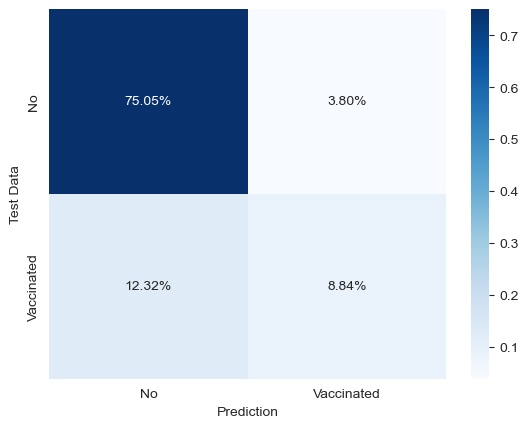

In [125]:
# Confusion Matrix for H1N1 
confusion(rf_h1n1_smote , X_test_h1n1, y_test_h1n1)

**ROC-AUC**

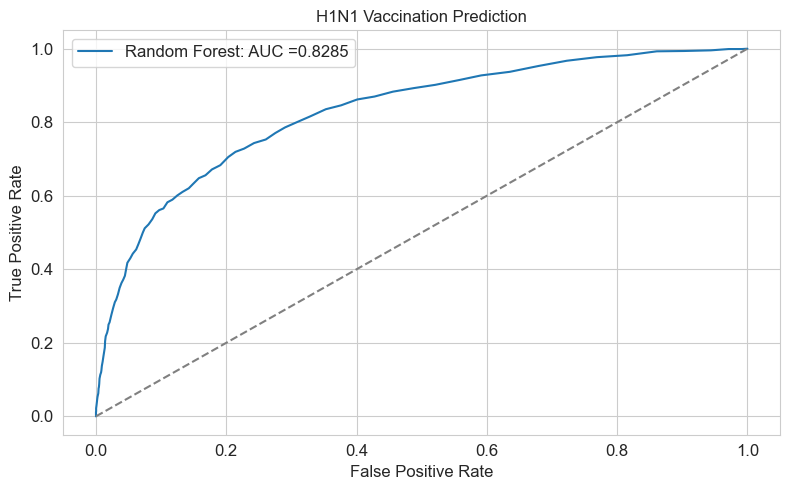

In [126]:
# Predicted Prob.
# H1N1
y_pred_h1_rf=rf_h1n1_smote.predict_proba(X_test_h1n1)[:, 1]

# Seasonal Flu
y_pred_s_rf =rf_seasonal.predict_proba(X_test_seasonal)[:, 1]


# FPR and TPR 
# H1N1
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_h1n1, y_pred_h1_rf)
# Seasonal Flu
fpr_rf_s, tpr_rf_s, thresholds_rf_s = roc_curve(y_test_seasonal, y_pred_s_rf)


# Plot the FPR and TPR data

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_rf, tpr_rf, alpha=1,
       label=f'Random Forest: AUC ={round(roc_auc_score(y_test_h1n1, y_pred_h1_rf),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('H1N1 Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

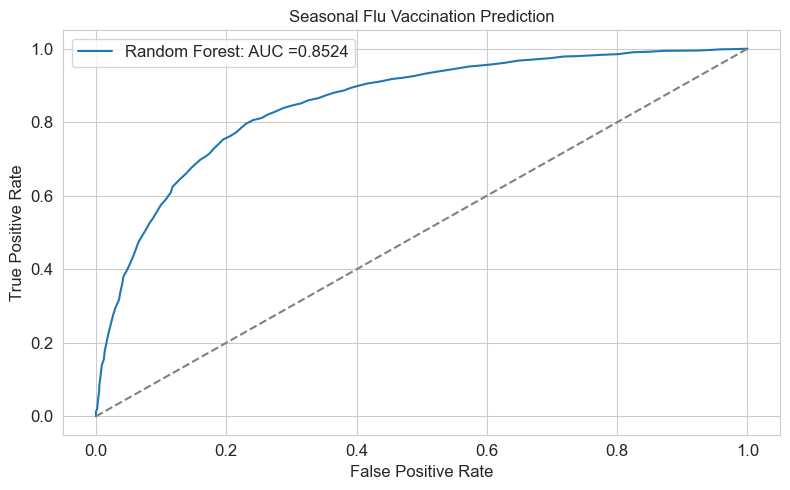

In [127]:
# Seasonal Flu 

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_rf_s, tpr_rf_s, alpha=1,
       label=f'Random Forest: AUC ={round(roc_auc_score(y_test_seasonal, y_pred_s_rf),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('Seasonal Flu Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


Comparison

Accuracy: The accuracies of the two models are quite comparable. The Logistic Regression model edges out with a marginally higher accuracy, leading by approximately 0.26%.

Precision & Recall for Class 0: The precision for predicting non-recipients of the seasonal vaccine is nearly identical in both models. However, the Logistic Regression model boasts a marginally better recall, exceeding by around 1%.

Precision & Recall for Class 1: In predicting individuals who received the seasonal vaccine, the Logistic Regression model demonstrates a modest advantage, with both precision and recall higher by about 1%.

Interpretation: The performance of both models on the validation set is quite similar. Yet, the Logistic Regression model exhibits a slight superiority across the metrics of accuracy, precision, and recall."


**Final Model (Gradient Booster Classifier)**

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting for h1n1_vaccine
gb_model_h1n1 = GradientBoostingClassifier(loss= 'exponential', learning_rate= .05, random_state = 42,
                                                max_depth=3, max_features='log2', n_estimators=700)
gb_model_h1n1.fit(X_train_h1n1_smote, y_train_h1n1_smote)
y_pred_gb_h1n1 = gb_model_h1n1.predict(X_test_h1n1)
accuracy_gb_h1n1 = accuracy_score(y_test_h1n1, y_pred_gb_h1n1)

# Train Gradient Boosting for seasonal_vaccine
gb_model_seasonal = GradientBoostingClassifier(loss= 'exponential', learning_rate= .05, random_state = 42,
                                                max_depth=3, max_features='log2', n_estimators=700)
gb_model_seasonal.fit(X_train_seasonal, y_train_seasonal)
y_pred_gb_seasonal = gb_model_seasonal.predict(X_test_seasonal)
accuracy_gb_seasonal = accuracy_score(y_test_seasonal, y_pred_gb_seasonal)

accuracy_gb_h1n1, accuracy_gb_seasonal


(0.8399475851740921, 0.7894047173343317)

In [129]:
# Accuracy rate, Precision, Recall, F1-score
print('H1N1 Flu')
print(classification_report(y_test_h1n1, gb_model_h1n1.predict(X_test_h1n1)) )
print('Seasonal Flu')
print(classification_report(y_test_seasonal, gb_model_h1n1.predict(X_test_seasonal)) )

H1N1 Flu
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4212
           1       0.67      0.48      0.56      1130

    accuracy                           0.84      5342
   macro avg       0.77      0.71      0.73      5342
weighted avg       0.83      0.84      0.83      5342

Seasonal Flu
              precision    recall  f1-score   support

           0       0.60      0.94      0.73      2891
           1       0.79      0.26      0.39      2451

    accuracy                           0.63      5342
   macro avg       0.70      0.60      0.56      5342
weighted avg       0.69      0.63      0.58      5342



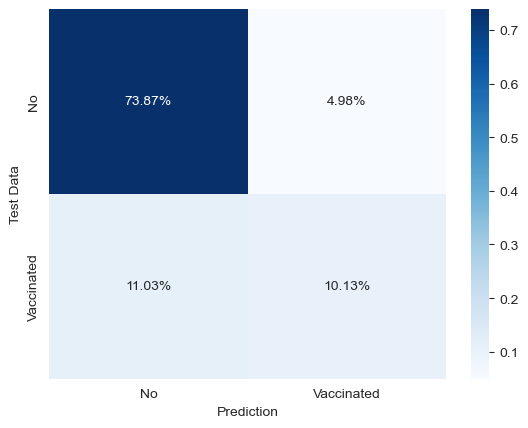

In [130]:
# Confusion Matrix for H1N1 
confusion(gb_model_h1n1 , X_test_h1n1, y_test_h1n1)

**ROC-AUC**

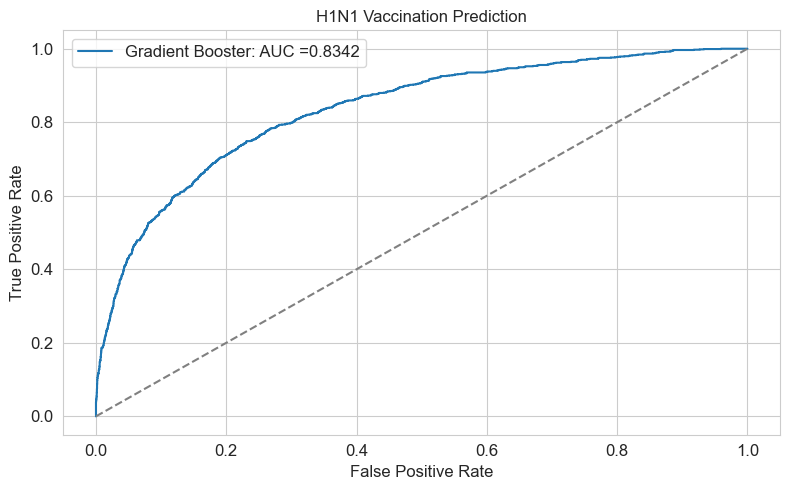

In [131]:
# Predicted Prob.
# H1N1
y_pred_h1_gbc=gb_model_h1n1.predict_proba(X_test_h1n1)[:, 1]

# Seasonal Flu
y_pred_s_gbc =gb_model_seasonal.predict_proba(X_test_seasonal)[:, 1]


# FPR and TPR 
# H1N1
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test_h1n1, y_pred_h1_gbc)
# Seasonal Flu
fpr_gbc_s, tpr_gbc_s, thresholds_gbc_s = roc_curve(y_test_seasonal, y_pred_s_gbc)


# Plot the FPR and TPR data

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_gbc, tpr_gbc, alpha=1,
       label=f'Gradient Booster: AUC ={round(roc_auc_score(y_test_h1n1, y_pred_h1_gbc),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('H1N1 Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

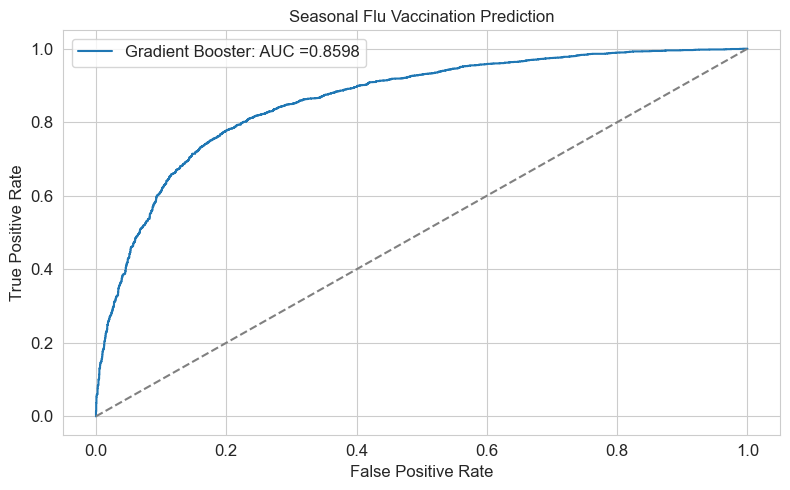

In [132]:
# Seasonal Flu 

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_gbc_s, tpr_gbc_s, alpha=1,
       label=f'Gradient Booster: AUC ={round(roc_auc_score(y_test_seasonal, y_pred_s_gbc),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('Seasonal Flu Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

**Predict probabilities and plot their distribution**

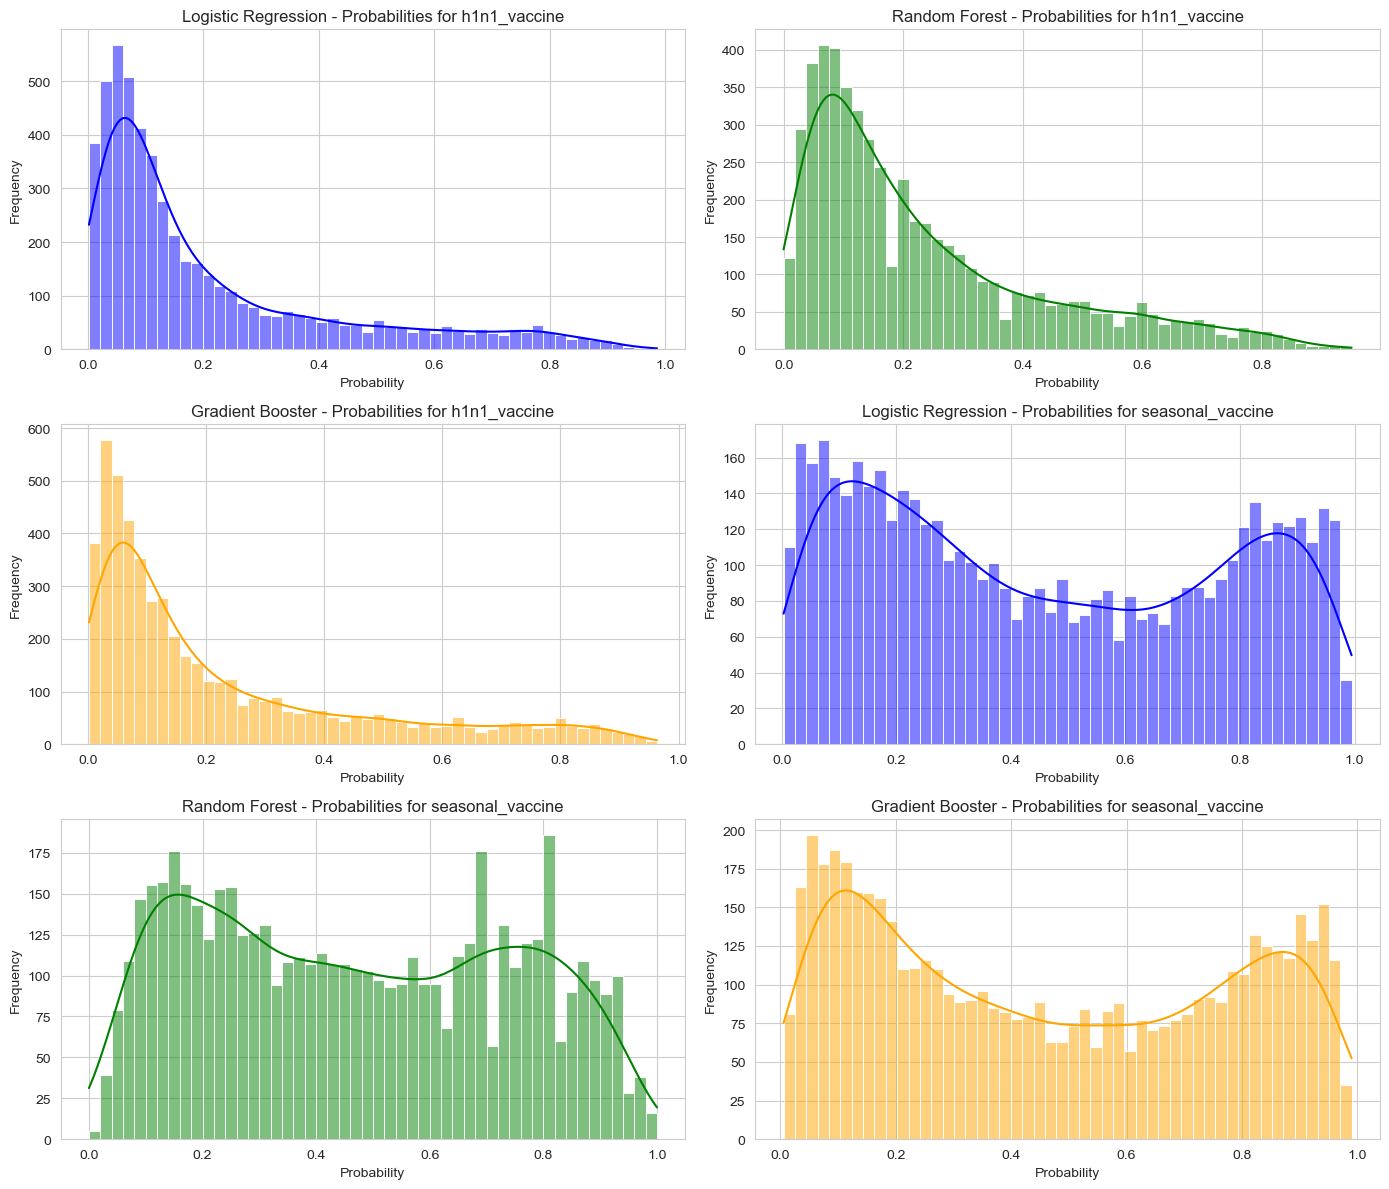

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities using the models
prob_logreg_h1n1 = logreg_h1n1.predict_proba(X_test_h1n1)[:, 1]  # probabilities for class 1
prob_rf_h1n1 = rf_h1n1_smote.predict_proba(X_test_h1n1)[:, 1]
prob_gb_model_h1n1=gb_model_h1n1.predict_proba(X_test_h1n1)[:, 1]

prob_logreg_seasonal = logreg_seasonal.predict_proba(X_test_seasonal)[:, 1]
prob_rf_seasonal = rf_seasonal.predict_proba(X_test_seasonal)[:, 1]
prob_gb_model_seasonal=gb_model_seasonal.predict_proba(X_test_h1n1)[:, 1]

# Plotting the distribution of probabilities
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# H1N1 Vaccine
sns.histplot(prob_logreg_h1n1, ax=ax[0, 0], bins=50, kde=True, color='blue')
ax[0, 0].set_title('Logistic Regression - Probabilities for h1n1_vaccine')
ax[0, 0].set_xlabel('Probability')
ax[0, 0].set_ylabel('Frequency')

sns.histplot(prob_rf_h1n1, ax=ax[0, 1], bins=50, kde=True, color='green')
ax[0, 1].set_title('Random Forest - Probabilities for h1n1_vaccine')
ax[0, 1].set_xlabel('Probability')
ax[0, 1].set_ylabel('Frequency')

sns.histplot(prob_gb_model_h1n1, ax=ax[1, 0], bins=50, kde=True, color='orange')
ax[1, 0].set_title('Gradient Booster - Probabilities for h1n1_vaccine')
ax[1, 0].set_xlabel('Probability')
ax[1, 0].set_ylabel('Frequency')

# Seasonal Vaccine
sns.histplot(prob_logreg_seasonal, ax=ax[1, 1], bins=50, kde=True, color='blue')
ax[1, 1].set_title('Logistic Regression - Probabilities for seasonal_vaccine')
ax[1, 1].set_xlabel('Probability')
ax[1, 1].set_ylabel('Frequency')

sns.histplot(prob_rf_seasonal, ax=ax[2, 0], bins=50, kde=True, color='green')
ax[2, 0].set_title('Random Forest - Probabilities for seasonal_vaccine')
ax[2, 0].set_xlabel('Probability')
ax[2, 0].set_ylabel('Frequency')

sns.histplot(prob_gb_model_seasonal, ax=ax[2, 1], bins=50, kde=True, color='orange')
ax[2, 1].set_title('Gradient Booster - Probabilities for seasonal_vaccine')
ax[2, 1].set_xlabel('Probability')
ax[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Seasonal Flu:

|Metric/Model	|Gradient Boosting	|Logistic Regression|	Random Forest
|---------------|-------------------|--------------|-------------|
|Precision (Class 1)|79%|78%|77%
|Recall (Class 1)	|26%|75%|74%
|F1-score (Class 1)	|40%|76%|76%
|Accuracy|63%|79%|78%
|Macro Avg F1-score	|56%|79%|78%

Comparison:

H1N1 Flu:

|Metric/Model|Gradient Boosting|Logistic Regression|Random Forest|
|---------------|-------------------|--------------|-------------|
|Precision (Class 1)|66%|48%|69%|
|Recall (Class 1)|48%|72%|42%|
|F1-score (Class 1)|56%|58%|52%|
|Accuracy|84%|78%|84%|
|Macro Avg F1-score|73%|71%|71%|



## RESULTS AND CONCLUSION

H1N1 Flu:

Precision: Random Forest and Gradient Boosting exhibit comparable precision, both outperforming Logistic Regression in this metric.

Recall: Logistic Regression excels in recall, effectively identifying a higher proportion of actual positive cases compared to the other two models.

F1-score: Considering the balance between precision and recall, the F1-scores for all three models are closely matched.

Accuracy: Gradient Boosting and Random Forest share identical accuracy metrics, surpassing Logistic Regression in this aspect.
Seasonal Flu:

Precision: Gradient Boosting leads in precision, followed by Logistic Regression and then Random Forest.

Recall: Logistic Regression tops recall, with Random Forest trailing slightly behind, while Gradient Boosting falls significantly short.

F1-score: Due to their more balanced precision and recall, Logistic Regression and Random Forest achieve notably higher F1-scores than Gradient Boosting for the seasonal vaccine.

Accuracy: Logistic Regression holds the highest accuracy, with Random Forest in close pursuit. Gradient Boosting trails with a considerably lower accuracy.

In Summary:
For h1n1_vaccine predictions, all three models show robust performances, each with minor variations in precision, recall, and F1-score.

In seasonal_vaccine predictions, despite Gradient Boosting's top precision, its lower recall results in a reduced F1-score and overall accuracy, contrasting with the more balanced outcomes of Logistic Regression and Random Forest.

Overall, for predicting h1n1_vaccine, all three models offer competitive performance, with slight variations in precision, recall, and F1-score.

For predicting seasonal_vaccine, while Gradient Boosting offers the highest precision, its recall is significantly lower than that of Logistic Regression and Random Forest, leading to a much lower F1-score and overall accuracy.


**RECOMMENDATIONS**

**Public Awareness and Education:**
H1N1 Concern & Knowledge: A significant portion of the survey respondents display moderate to high levels of concern and knowledge regarding H1N1. This indicates a certain effectiveness of public awareness campaigns, yet highlights the need for further efforts. Strategies should be designed to:

1. Address and inform individuals with moderate to high levels of concern to ensure they receive accurate information.
2. Reach out to those with low or no awareness, enhancing their understanding and awareness.

**Education Level:**

Higher vaccination rates are observed in individuals with advanced education. It's crucial to direct educational campaigns towards those with lower educational levels, using formats that are both accessible and comprehensible.

Income and Poverty: Focused campaigns in high-poverty regions are essential, potentially integrating free vaccination services or subsidies, to promote vaccination among these populations.

**Health Infrastructure and Support:**

Health Insurance: A notable portion of respondents lack health insurance. Policymakers need to focus on expanding access to affordable health insurance, which may indirectly boost vaccination rates and overall health.

**Targeted Interventions:**

Race: There is a clear discrepancy in vaccination rates across different racial groups. Customized interventions and awareness programs are needed to address unique challenges and barriers encountered by racial groups with lower vaccination rates.
Sex: Although the difference is marginal, it's important to ensure that both men and women equally receive information and access to vaccination services.

**Model Recommendations for Predictive Analytics:**
H1N1 Flu Predictions: With all models demonstrating competent performance, an ensemble methodology harnessing each technique's strengths could prove effective.

Seasonal Flu Predictions: Given Gradient Boosting's markedly lower recall, it may not optimize seasonal_vaccine prediction, particularly if capturing true positives is imperative. Logistic Regression offers a balanced approach for this objective.